In [1]:
pip install xgbfir

Note: you may need to restart the kernel to use updated packages.


In [55]:
# Data Handling Libraries

import pandas as pd
import numpy as np

from collections import OrderedDict


# Data Visualization Libraries

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci

# Model Building Libraries

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


# Regression Models

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor

import xgboost
from xgboost import XGBRegressor


# Model Evalaution Libraries
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
df=pd.read_excel('Capstone Project.xlsx')

In [57]:
df_copy1=df.copy()

In [58]:
df_copy2=df.copy()

In [59]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [60]:
df.tail()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61

## Performing basic EDA

In [61]:
df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

In [62]:
def custom_summary(data):
    result=[] # This is an empty list to store the iterated result of stats
    for col in data.columns:
        if data[col].dtype!='O':
            stats=OrderedDict({'Feature_name':col,
                               'Count':data[col].count(),
                               'Minimum':round(data[col].min(),2),
                               'Quartile 1':round(data[col].quantile(0.25),2),
                               'Mean':round(data[col].mean(),2),
                               'Median':round(data[col].median(),2),
                               'Mode':round(data[col].mode(),2),
                               'Quartile 3':round(data[col].quantile(0.75),2),
                               'IQR':round(data[col].quantile(0.75),2)-round(data[col].quantile(0.25),2),
                               'Maximum':round(data[col].max(),2),
                               'Variance':round(data[col].var(),2),
                               'SD':round(data[col].std(),2),
                               'Kurtosis':round(data[col].kurt(),0),
                               'Skewness':round(data[col].skew(),2)
                               
                              })
            result.append(stats)
            
            
    # Skewness comments
    
    
        if stats['Skewness'] < -1:
            skewtype='Highly Negatively Skewed'
        elif -1<stats['Skewness']<-0.5:
            skewtype='Moderately Negatively Skewed'
        elif -0.5<stats['Skewness']<0:
            skewtype="Fairly symmetric but Negative"
        elif 0<stats['Skewness']<0.5:
            skewtype="Fairly Symmetric but positive"
        elif 0.5<stats['Skewness']<1:
            skewtype='Moderately Positively Skewed'
        elif stats['Skewness']>1:
            skewtype='Highly Positively Skewed'
        else:
            skewtype='Error'
        stats['Skewtype']=skewtype
    
    #Outlier comments ---||An outlier is a data point that lies outside the overall pattern in a distribution||---
    
        up=stats['Quartile 3']+1.5*stats['IQR']
        low=stats['Quartile 1']-1.5*stats['IQR']
        if len([x for x in data[col] if x < low or x > up]) > 0:
            outlier_comment='Has Outliers'
        else:
            outlier_comment='Has No Outliers'
        stats['Outlier_Comments']=outlier_comment
    
    #Condition to type of Kurtosis
        
        if stats['Kurtosis']==0:
            Kurtype='Mesokurtic'
        elif stats['Kurtosis']>0:
            Kurtype='Leptokurtic'
        else:
            Kurtype='Platikurtic'
        stats['Kurtype']=Kurtype
            
              
       
    result_df=pd.DataFrame(data=result)
    return result_df

In [63]:
custom_summary(df)

Feature_name  Count  Minimum  Quartile 1    Mean  Median  \
0        cement   1030   102.00      192.38  281.17  272.90   
1          slag   1030     0.00        0.00   73.90   22.00   
2           ash   1030     0.00        0.00   54.19    0.00   
3         water   1030   121.80      164.90  181.57  185.00   
4  superplastic   1030     0.00        0.00    6.20    6.40   
5     coarseagg   1030   801.00      932.00  972.92  968.00   
6       fineagg   1030   594.00      730.95  773.58  779.50   
7           age   1030     1.00        7.00   45.66   28.00   
8      strength   1030     2.33       23.71   35.82   34.45   

                                   Mode  Quartile 3     IQR  Maximum  \
0  0    362.6
1    425.0
dtype: float64      350.00  157.62    540.0   
1               0    0.0
dtype: float64      142.95  142.95    359.4   
2               0    0.0
dtype: float64      118.30  118.30    200.1   
3             0    192.0
dtype: float64      192.00   27.10    247.0   
4               0    0.0
dtype: float64       10.20   10.20     32.2   
5             0    932.0
dtype: float64     1029.40   97.40   1145.0   
6  0    594.0
1    755.8
dtype: float64      824.00   93.05    992.6   
7                  0    28
dtype: int64       56.00   49.00    365.0   
8              0    33.4
dtype: float64       46.14   22.43     82.6   

   Variance      SD  Kurtosis  Skewness                       Skewtype  \
0  10921.58  104.51      -1.0      0.51   Moderately Positively Skewed   
1   7444.12   86.28      -1.0      0.80   Moderately Positively Skewed   
2   4095.62   64.00      -1.0      0.54   Moderately Positively Skewed   
3    456.00   21.35       0.0      0.07  Fairly Symmetric but positive   
4     35.69    5.97       1.0      0.91   Moderately Positively Skewed   
5   6045.68   77.75      -1.0     -0.04  Fairly symmetric but Negative   
6   6428.19   80.18      -0.0     -0.25  Fairly symmetric but Negative   
7   3990.44   63.17      12.0      3.27       Highly Positively Skewed   
8    279.08   16.71      -0.0      0.42  Fairly Symmetric but positive   

  Outlier_Comments      Kurtype  
0  Has No Outliers  Platikurtic  
1     Has Outliers  Platikurtic  
2  Has No Outliers  Platikurtic  
3     Has Outliers   Mesokurtic  
4     Has Outliers  Leptokurtic  
5  Has No Outliers  Platikurtic  
6     Has Outliers   Mesokurtic  
7     Has Outliers  Leptokurtic  
8     Has Outliers   Mesokurtic

## Perfroming Outlier treatment

In [64]:
def replace_outliers(data,col,method='Quartile',strategy='Median'):
    col_data=data[col]
    
    # Using the first method i.e Quartile
    
    if method=='Quartile':
        #q1,q3=np.percentile(col_data,[25,75])
        up=data[col].quantile(0.75)+1.5*(data[col].quantile(0.75)-data[col].quantile(0.25))
        low=data[col].quantile(0.25)-1.5*(data[col].quantile(0.75)-data[col].quantile(0.25))
        
    # Using the second method i.e Standard Deviation
    
    elif method=='Standard Deviation':
        up_lim=data[col].mean()+2*data[col].std()
        low_lim=data[col].mean()-2*data[col].std()
        
        
    else:
        print('Pass a correct Strategy')
    
    
    # Finding outliers
    
    outliers=data.loc[(col_data < low) | (col_data > up) ,col] # We are treating here with Quartile
    outlier_percentage=round(len(outliers)/len(data),2)*100
    
    #Likewise, we can also do using Standard Deviation method
    
    if len(outliers)==0:
        print('Feature', {col} ,"doesn't have any outliers")
    else:
        print("Total number of outliers is",len(outliers))
        print('/n')
        print('Outlier percentage is ',outlier_percentage)
        print('/n')
        print('Outliers are ',np.array(outliers))
        
        
    # Replacing the outliers
    if strategy=='Median':
        data.loc[(col_data < low) | (col_data > up) ,col]=data[col].median()
    elif strategy=='Mean':
        data.loc[(col_data < low) | (col_data > up) ,col]=data[col].mean()
    else:
        print('Error')
        
    return data
        

## ODT plots

In [65]:
# ODT  plots are outlier detection plots. There are 3 plots that we built in ODT
# 1: Descriptive Statistcs in the 1st plot
# 2: Distribution of the data with outliers
# 3: Distribution of data after outlier treatment

In [66]:
def odt_plots(data, col):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(30,30))
    
    #Descriptive stats. of a column using box-plot
    
    sns.boxplot(data[col],ax=ax1,color='r')
    ax1.set_title(col+' '+'Box-Plot')
    ax1.set_xlabel('Box-Plot')
    ax1.set_ylabel('Column Values')
    
    
    #Ploting histogram with outlier
    
    sns.distplot(data[col],ax=ax2,color='r',fit=sci.norm)
    ax2.axvline(data[col].mean(),color='g')
    ax2.axvline(data[col].median(),color='b')
    ax2.set_title(col+' '+'Distribution with outliers')
    ax2.set_xlabel('Density')
    ax2.set_ylabel('Column Values')
    
    
    #Plotting histogram without outliers:
    
    y=replace_outliers(data,col)
    
    sns.distplot(y[col],ax=ax3,color='r',fit=sci.norm)
    ax3.axvline(data[col].mean(),color='g')
    ax3.axvline(data[col].median(),color='b')    
    ax3.set_title(col+' '+'Distribution without outliers')
    ax3.set_xlabel('Density')
    ax3.set_ylabel('Column Values')
    plt.show()
        

Feature {'cement'} doesn't have any outliers


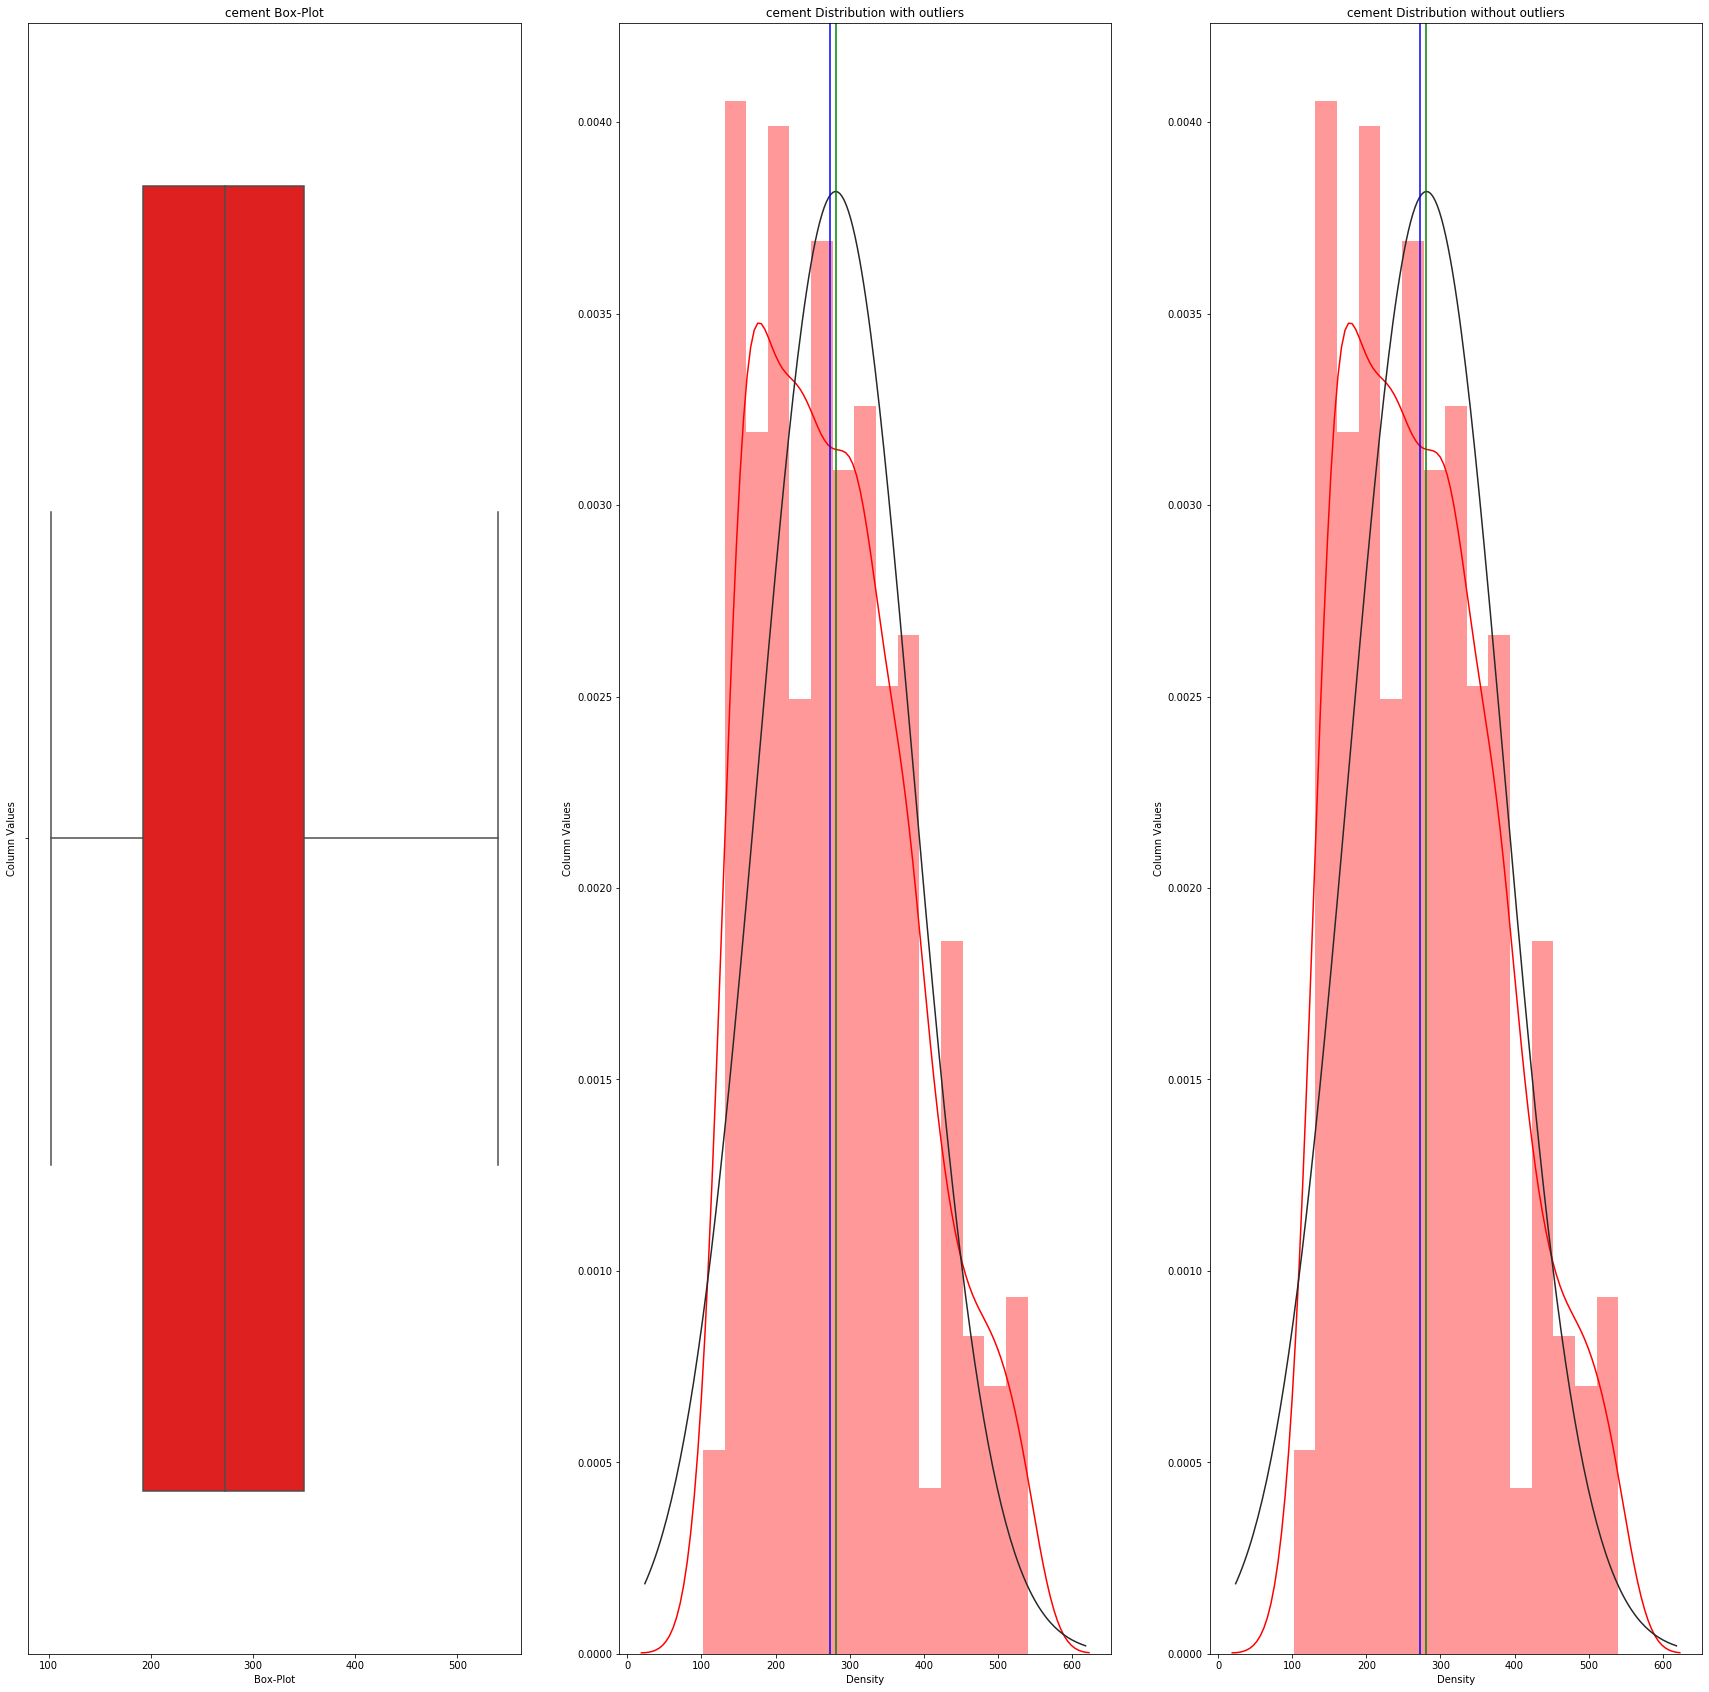

Total number of outliers is 2
/n
Outlier percentage is  0.0
/n
Outliers are  [359.4 359.4]


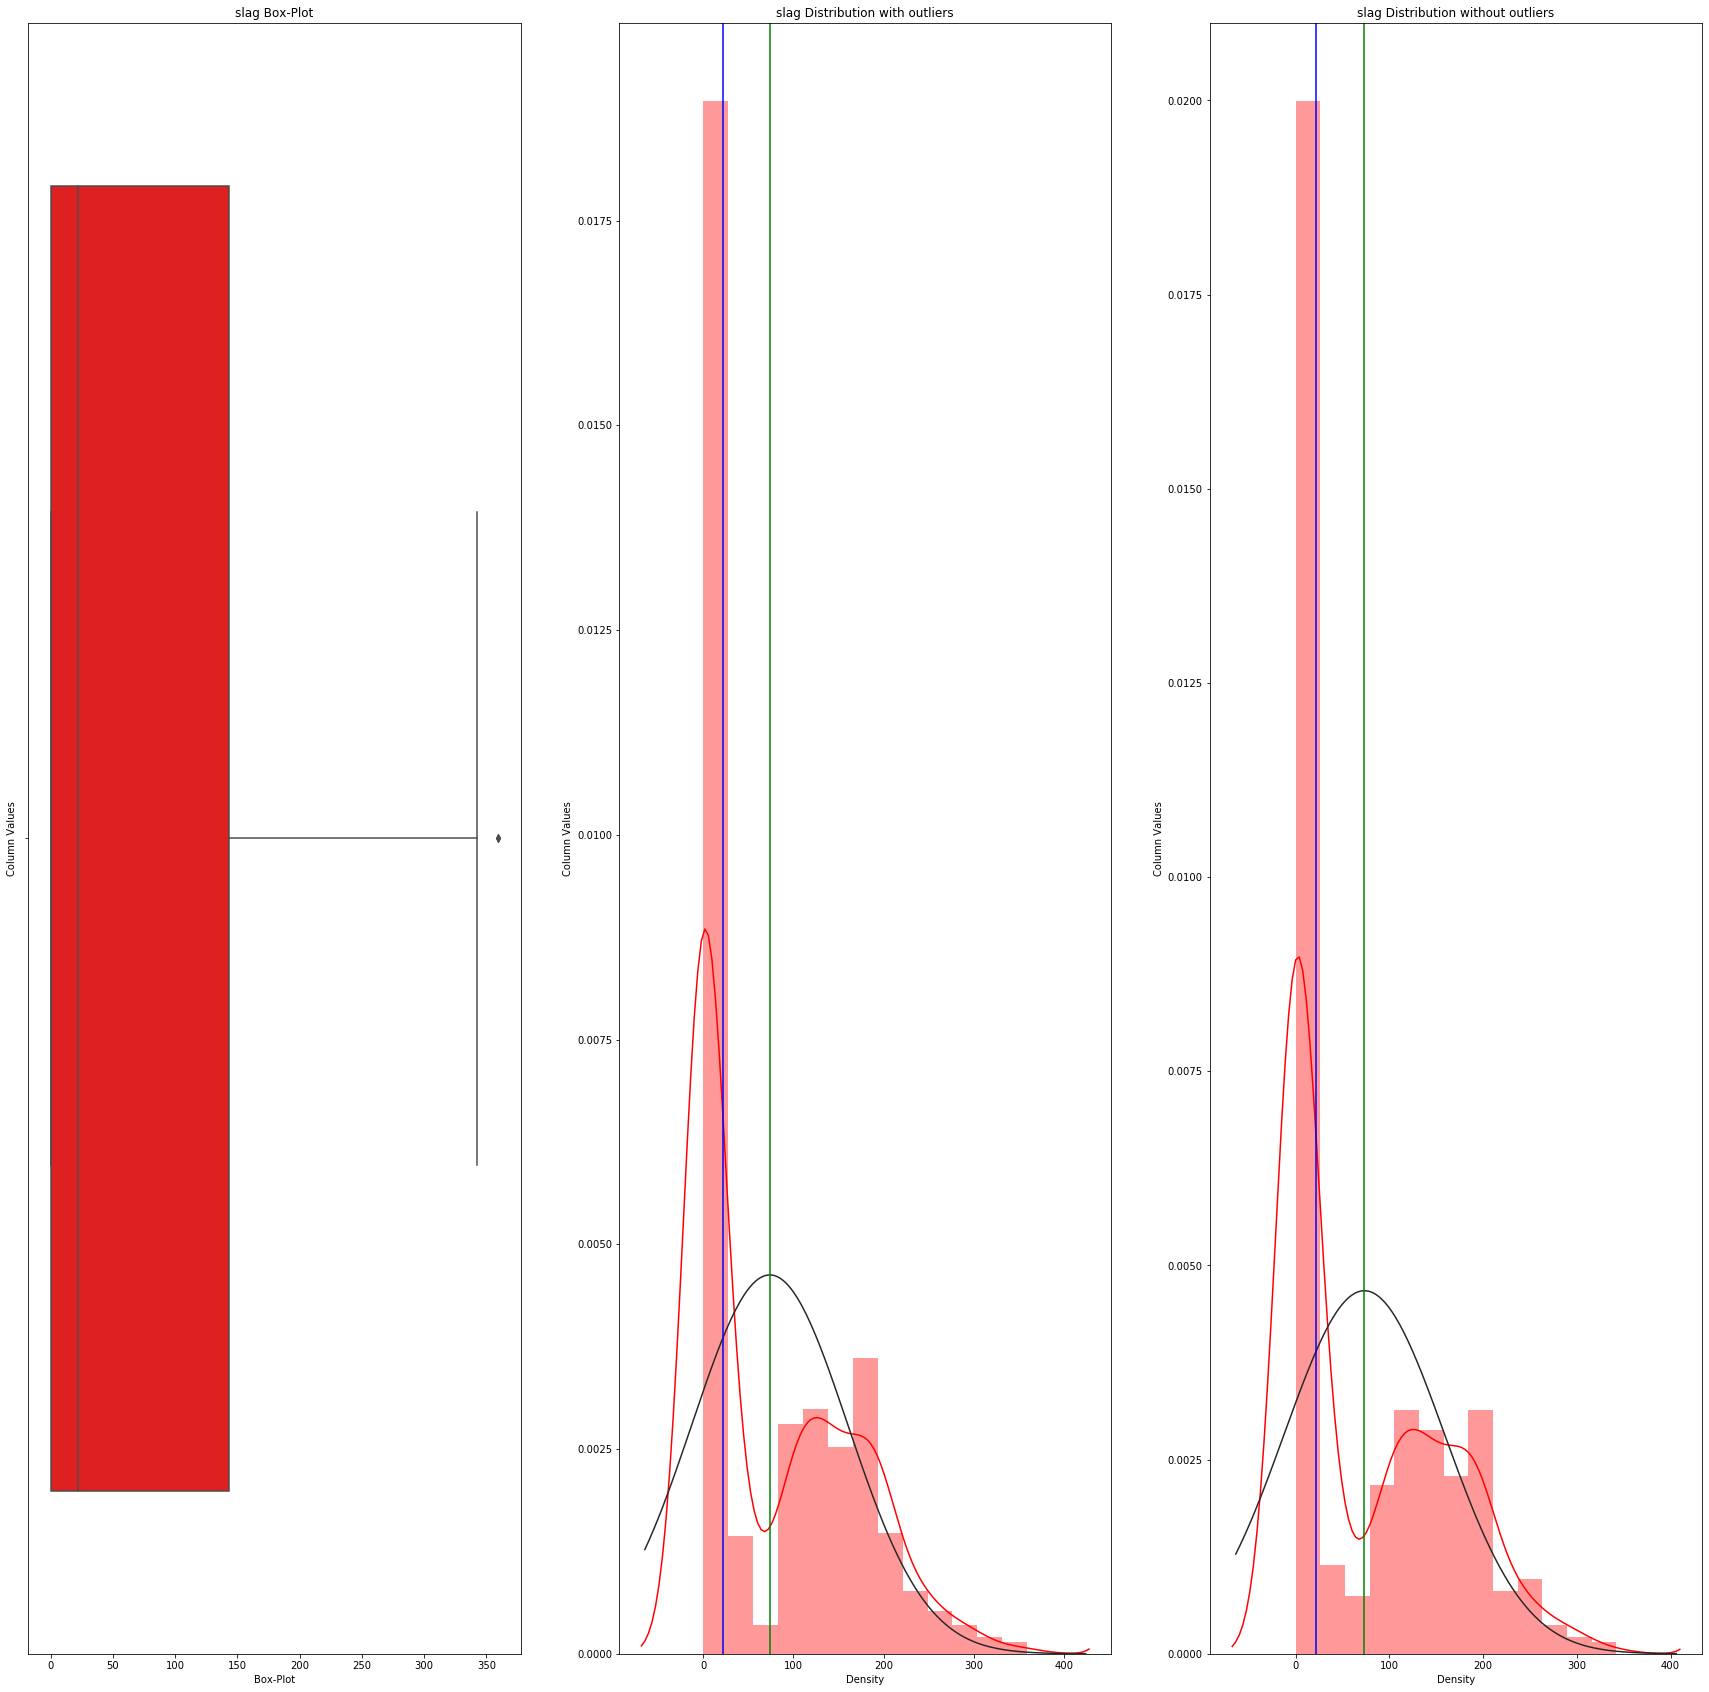

Feature {'ash'} doesn't have any outliers


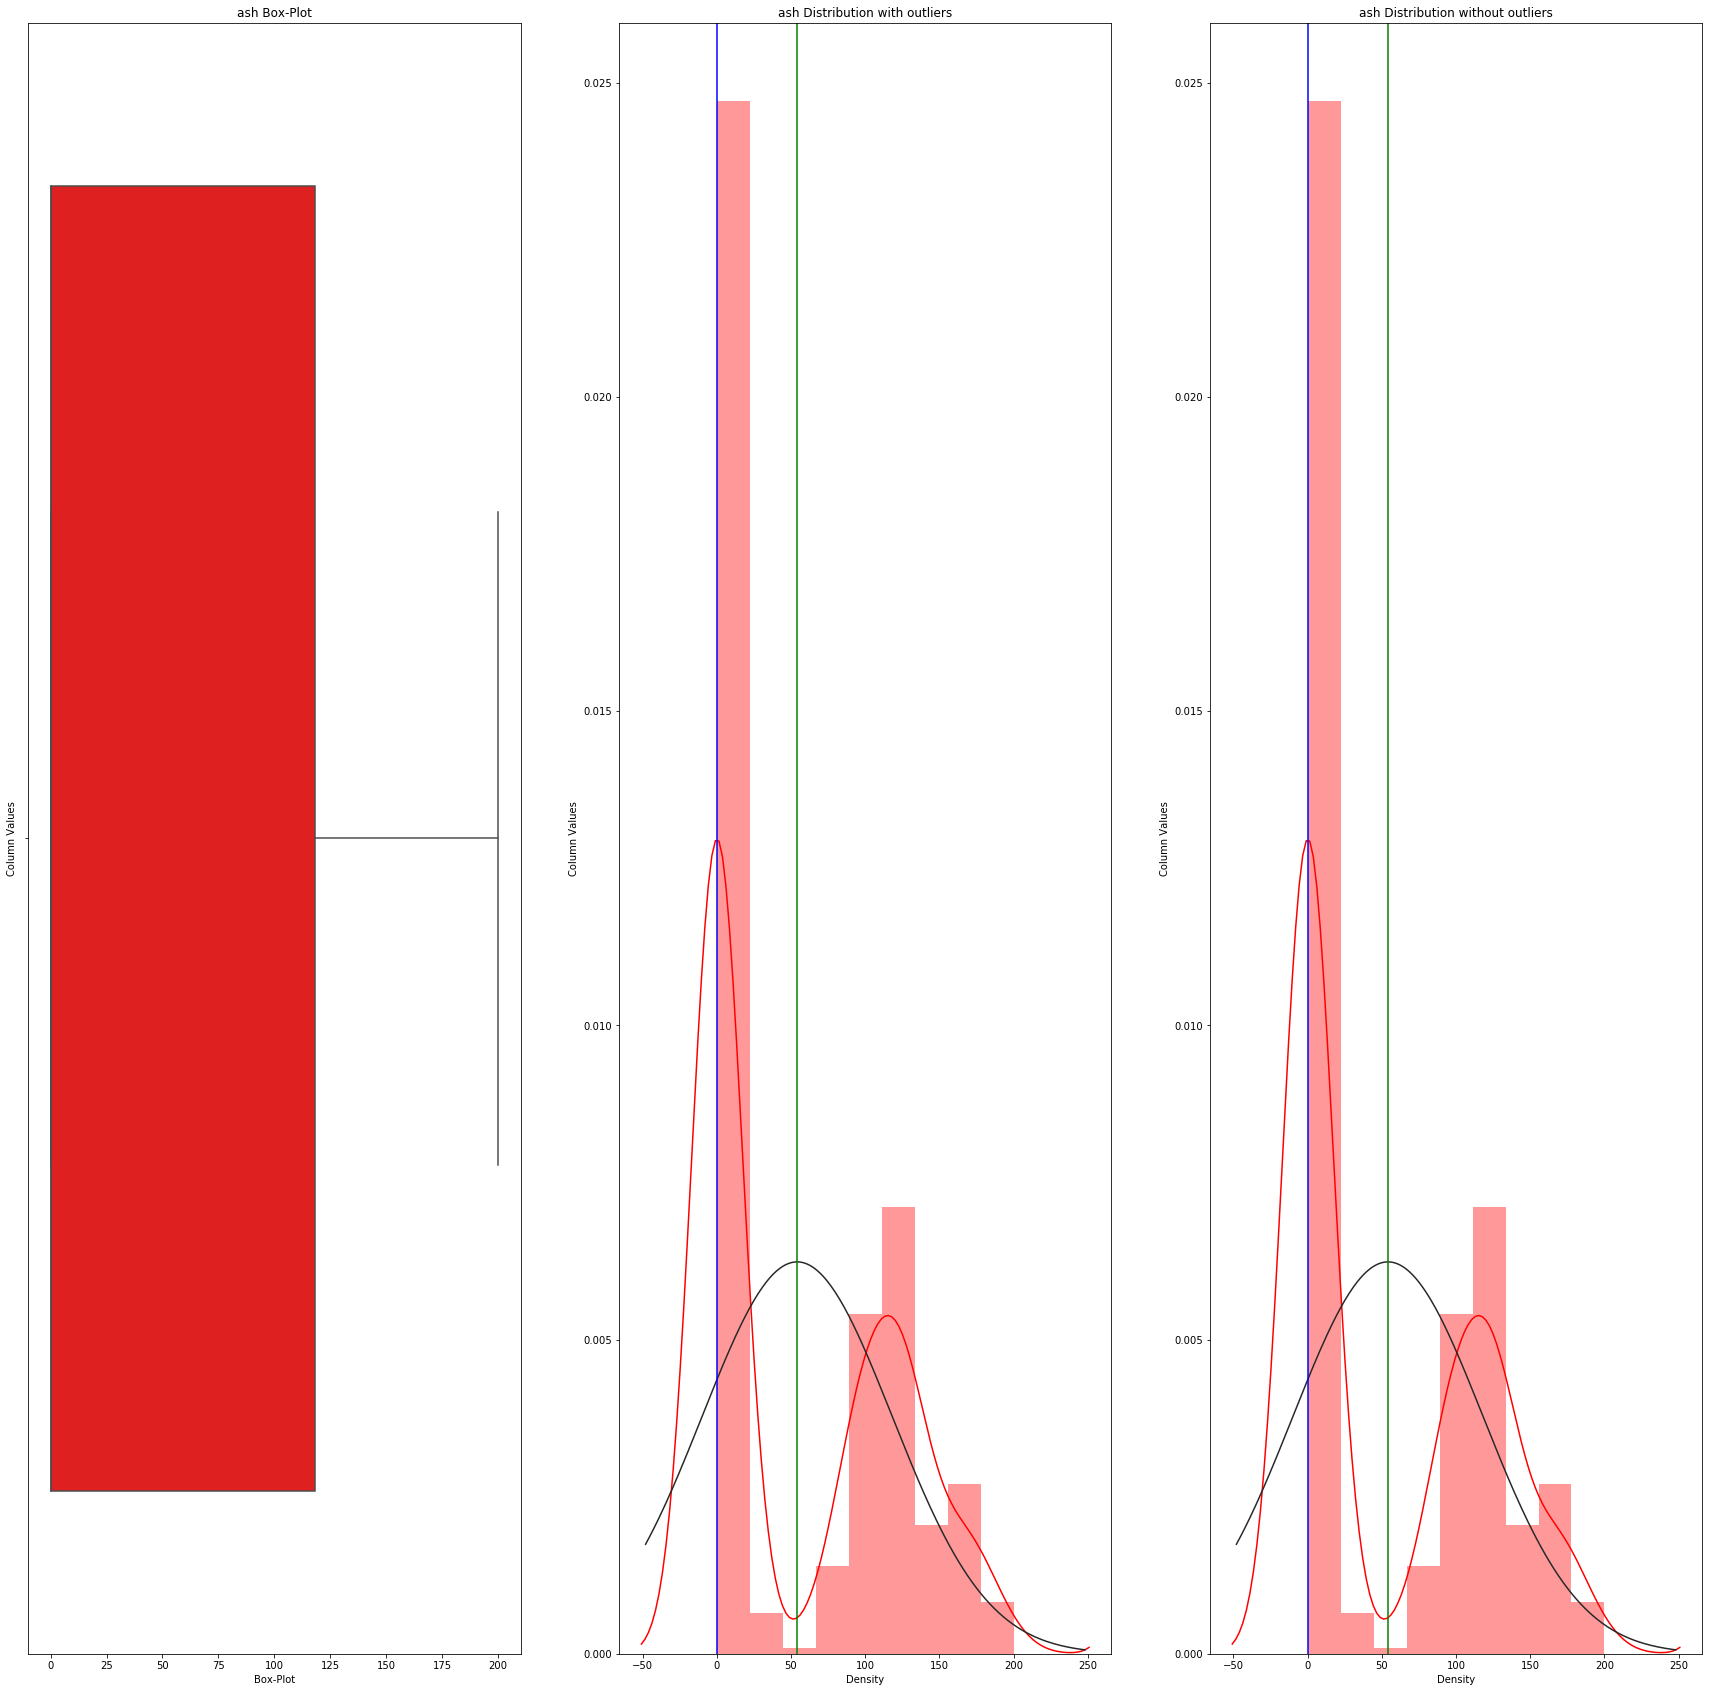

Total number of outliers is 9
/n
Outlier percentage is  1.0
/n
Outliers are  [247.  246.9 121.8 121.8 121.8 237.  121.8 236.7 121.8]


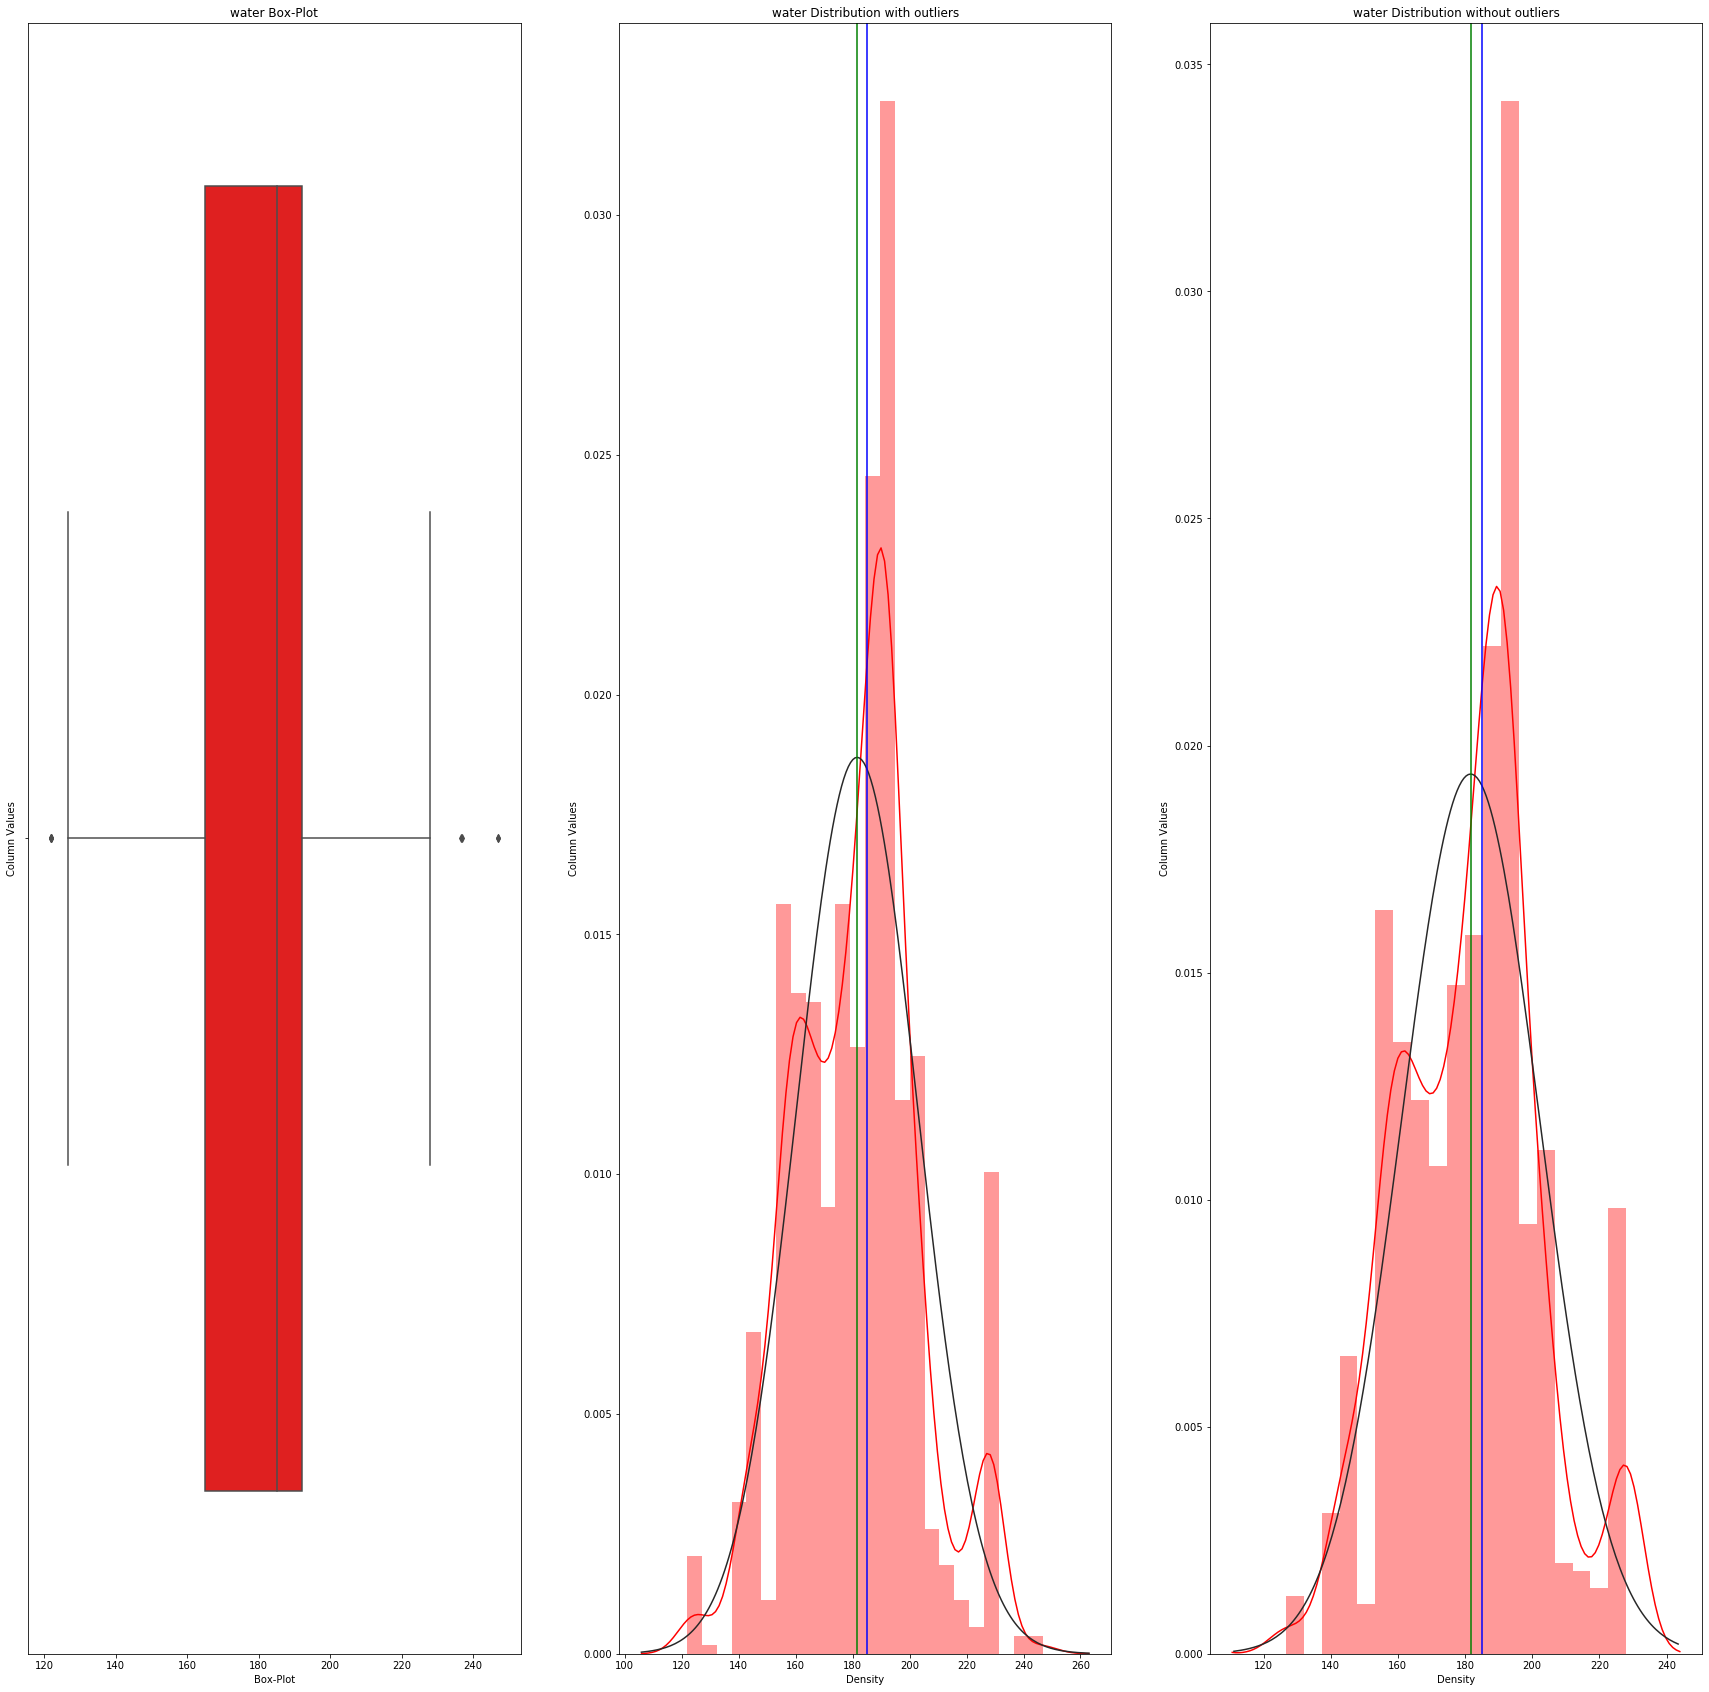

Total number of outliers is 10
/n
Outlier percentage is  1.0
/n
Outliers are  [28.2 28.2 32.2 32.2 28.2 32.2 32.2 28.2 32.2 28.2]


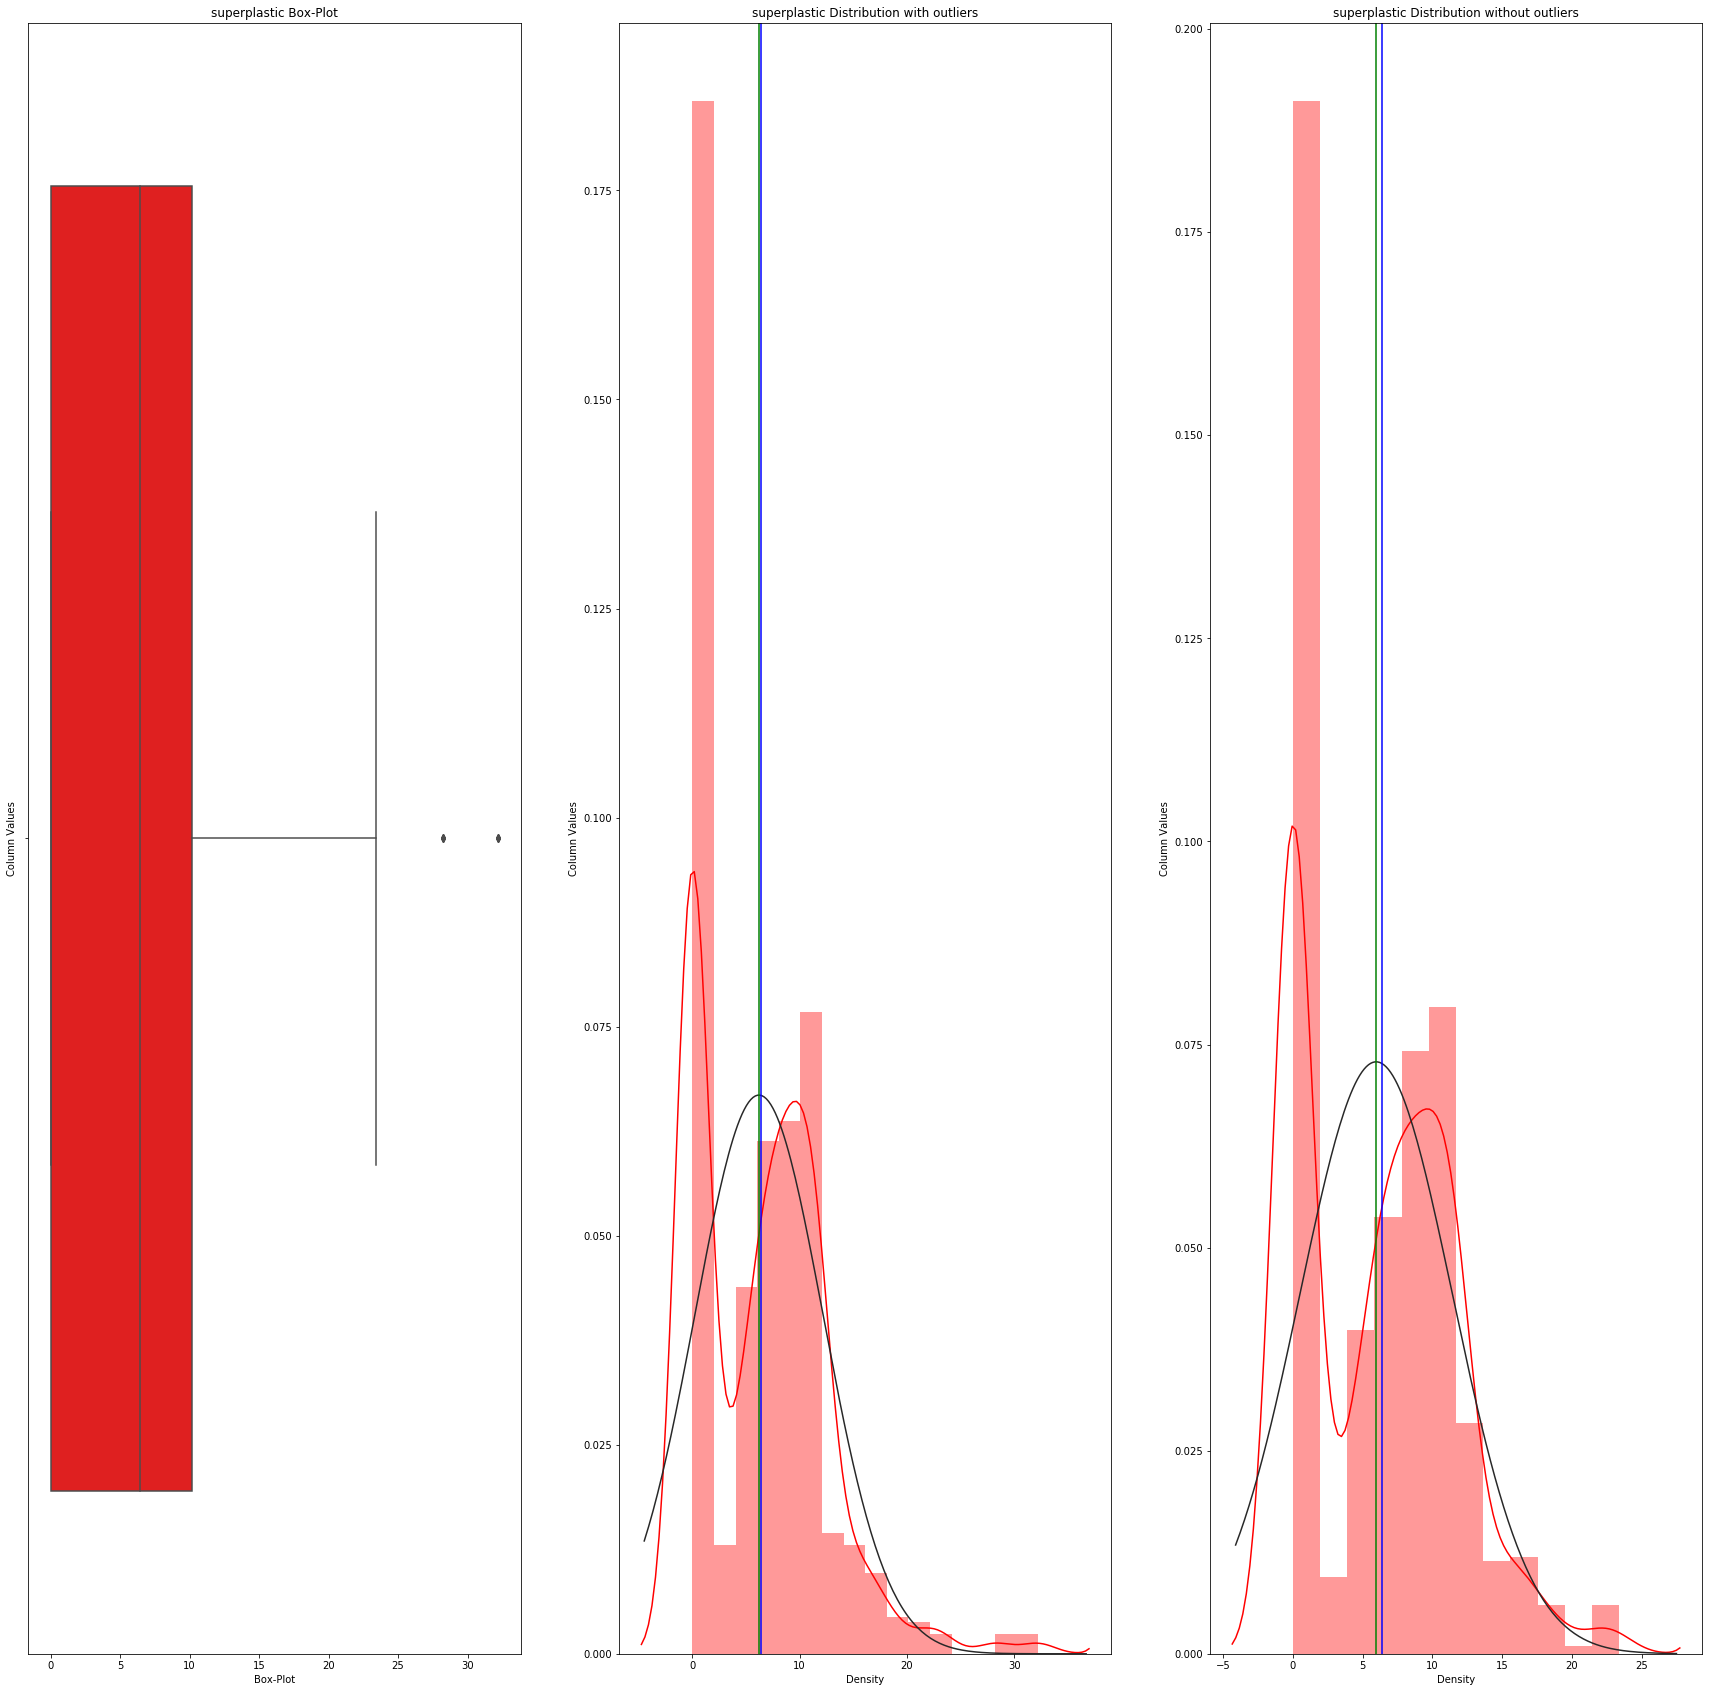

Feature {'coarseagg'} doesn't have any outliers


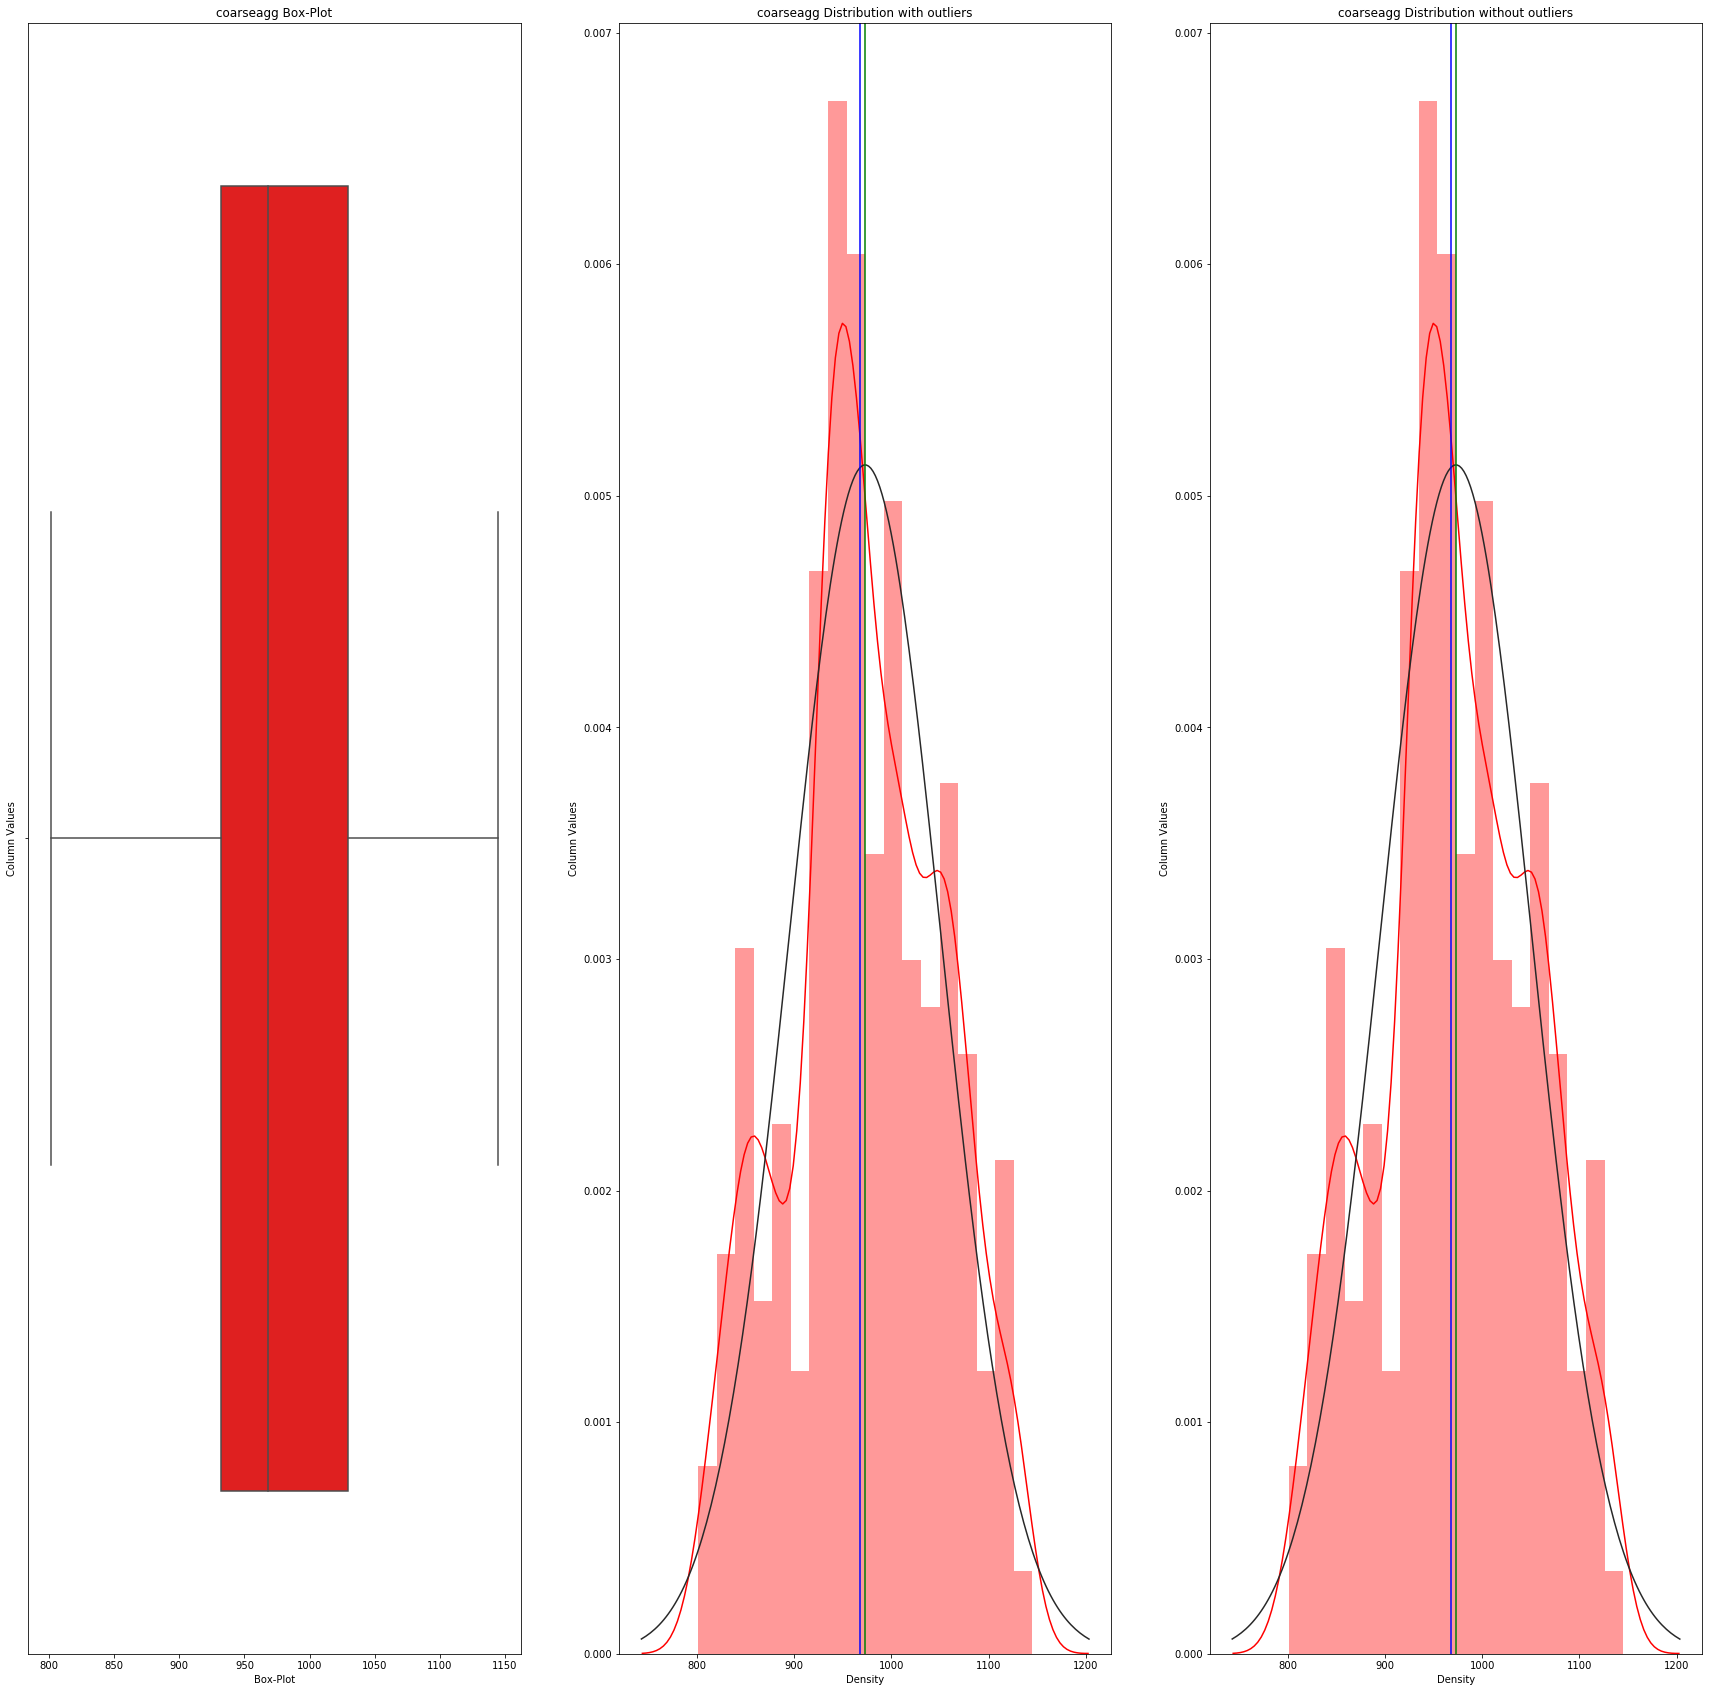

Total number of outliers is 5
/n
Outlier percentage is  0.0
/n
Outliers are  [992.6 992.6 992.6 992.6 992.6]


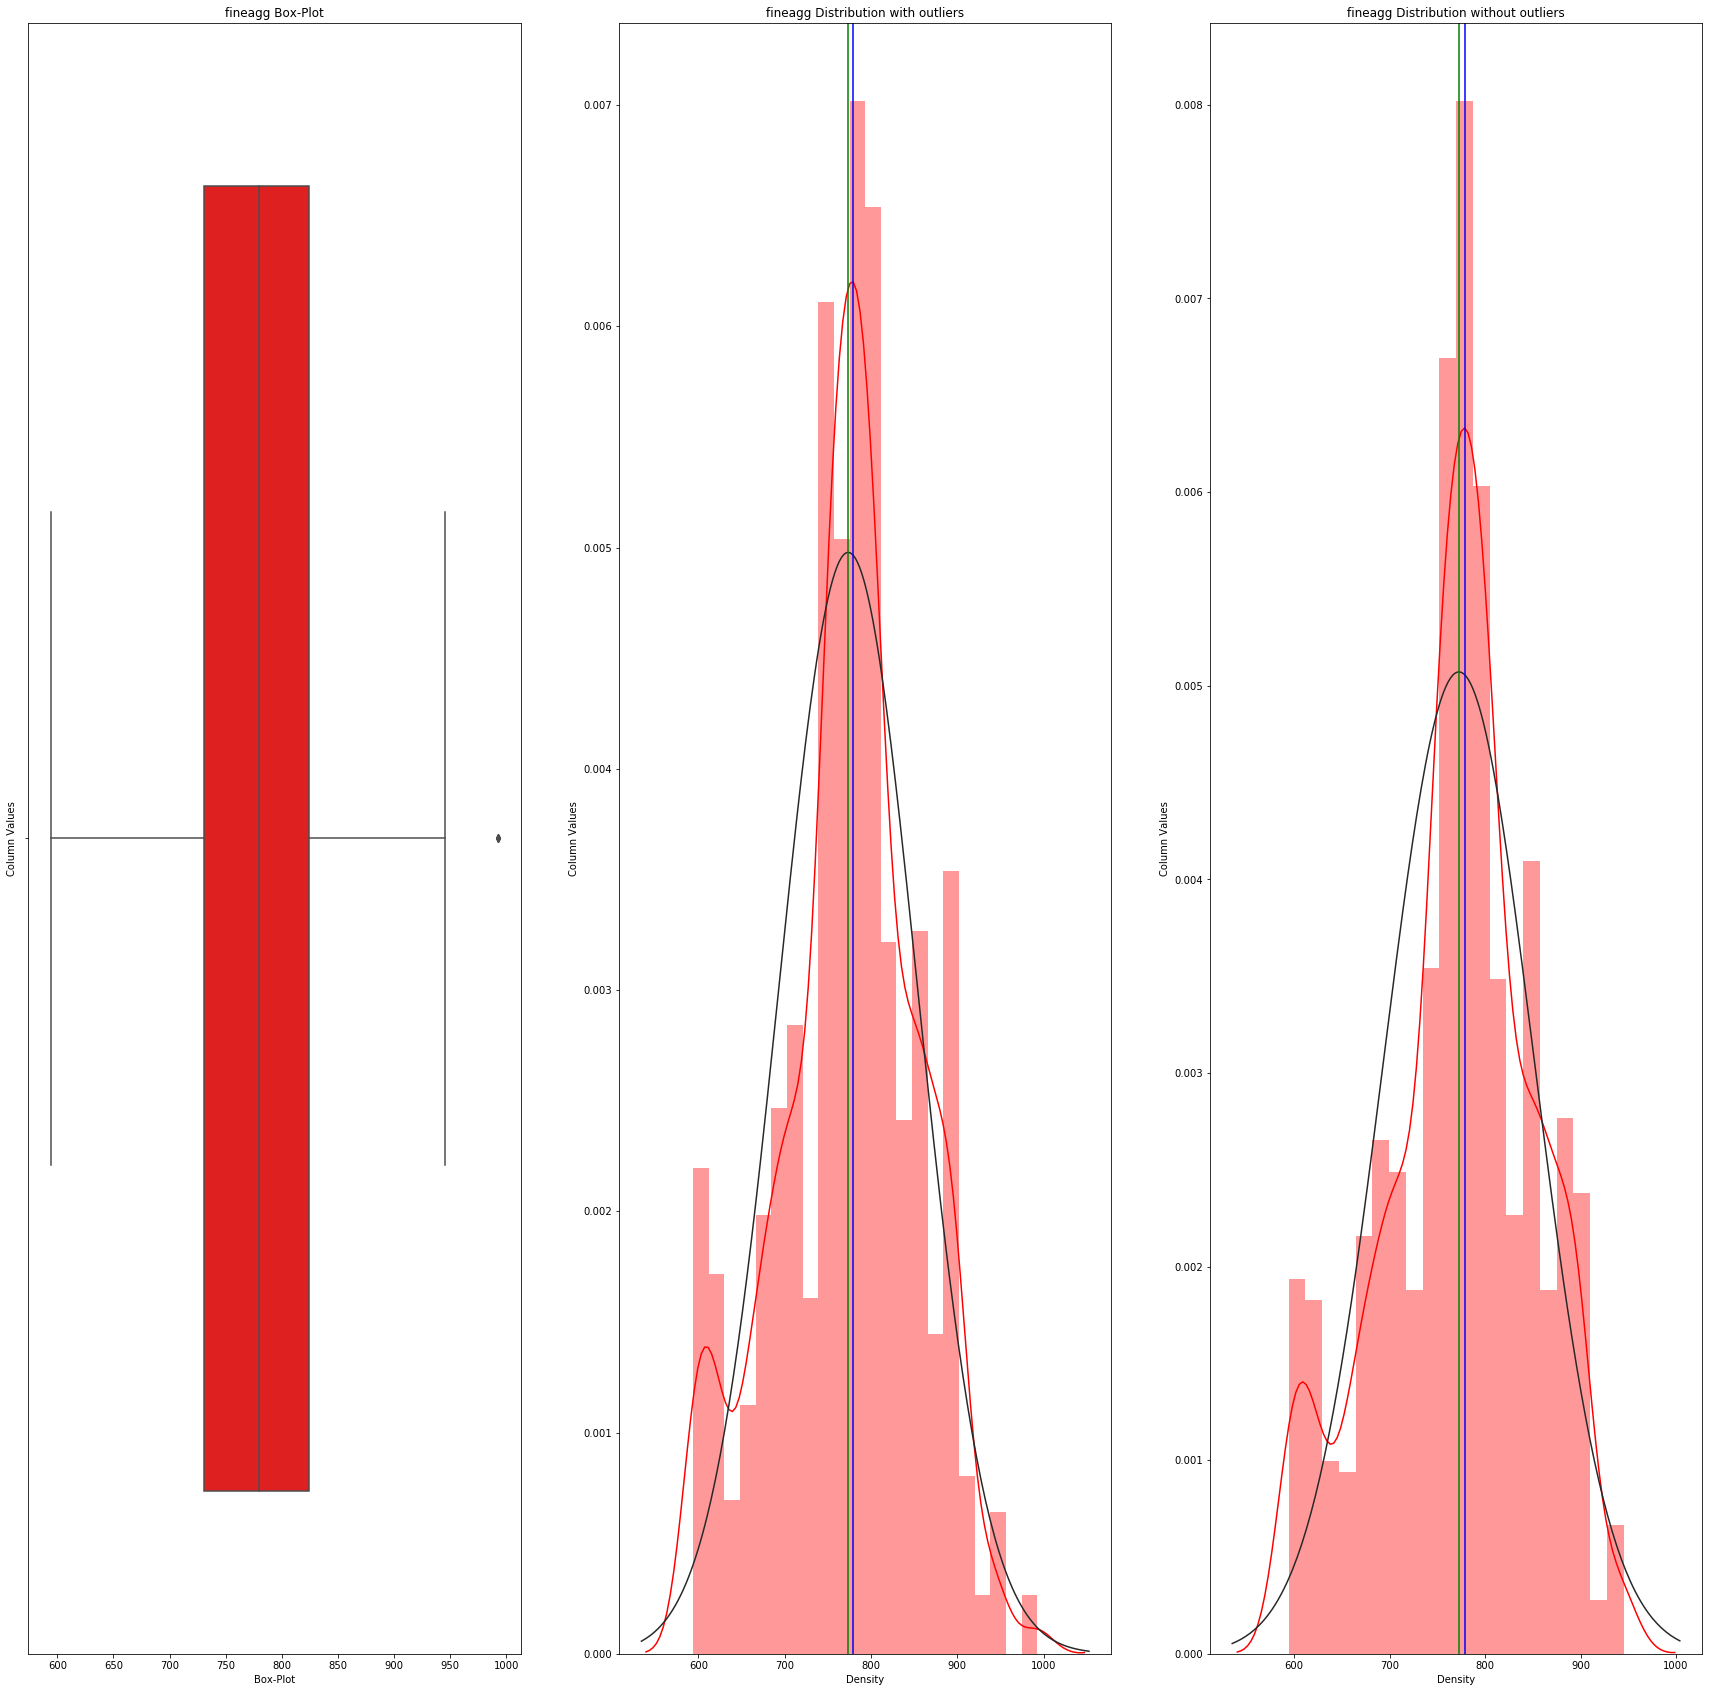

Total number of outliers is 59
/n
Outlier percentage is  6.0
/n
Outliers are  [180 365 180 180 180 365 180 270 180 360 365 365 180 180 270 270 270 270
 180 180 270 360 180 360 180 365 360 365 365 180 270 180 180 365 180 180
 270 270 180 180 365 365 180 365 360 180 270 180 270 180 365 360 270 365
 180 180 365 180 270]


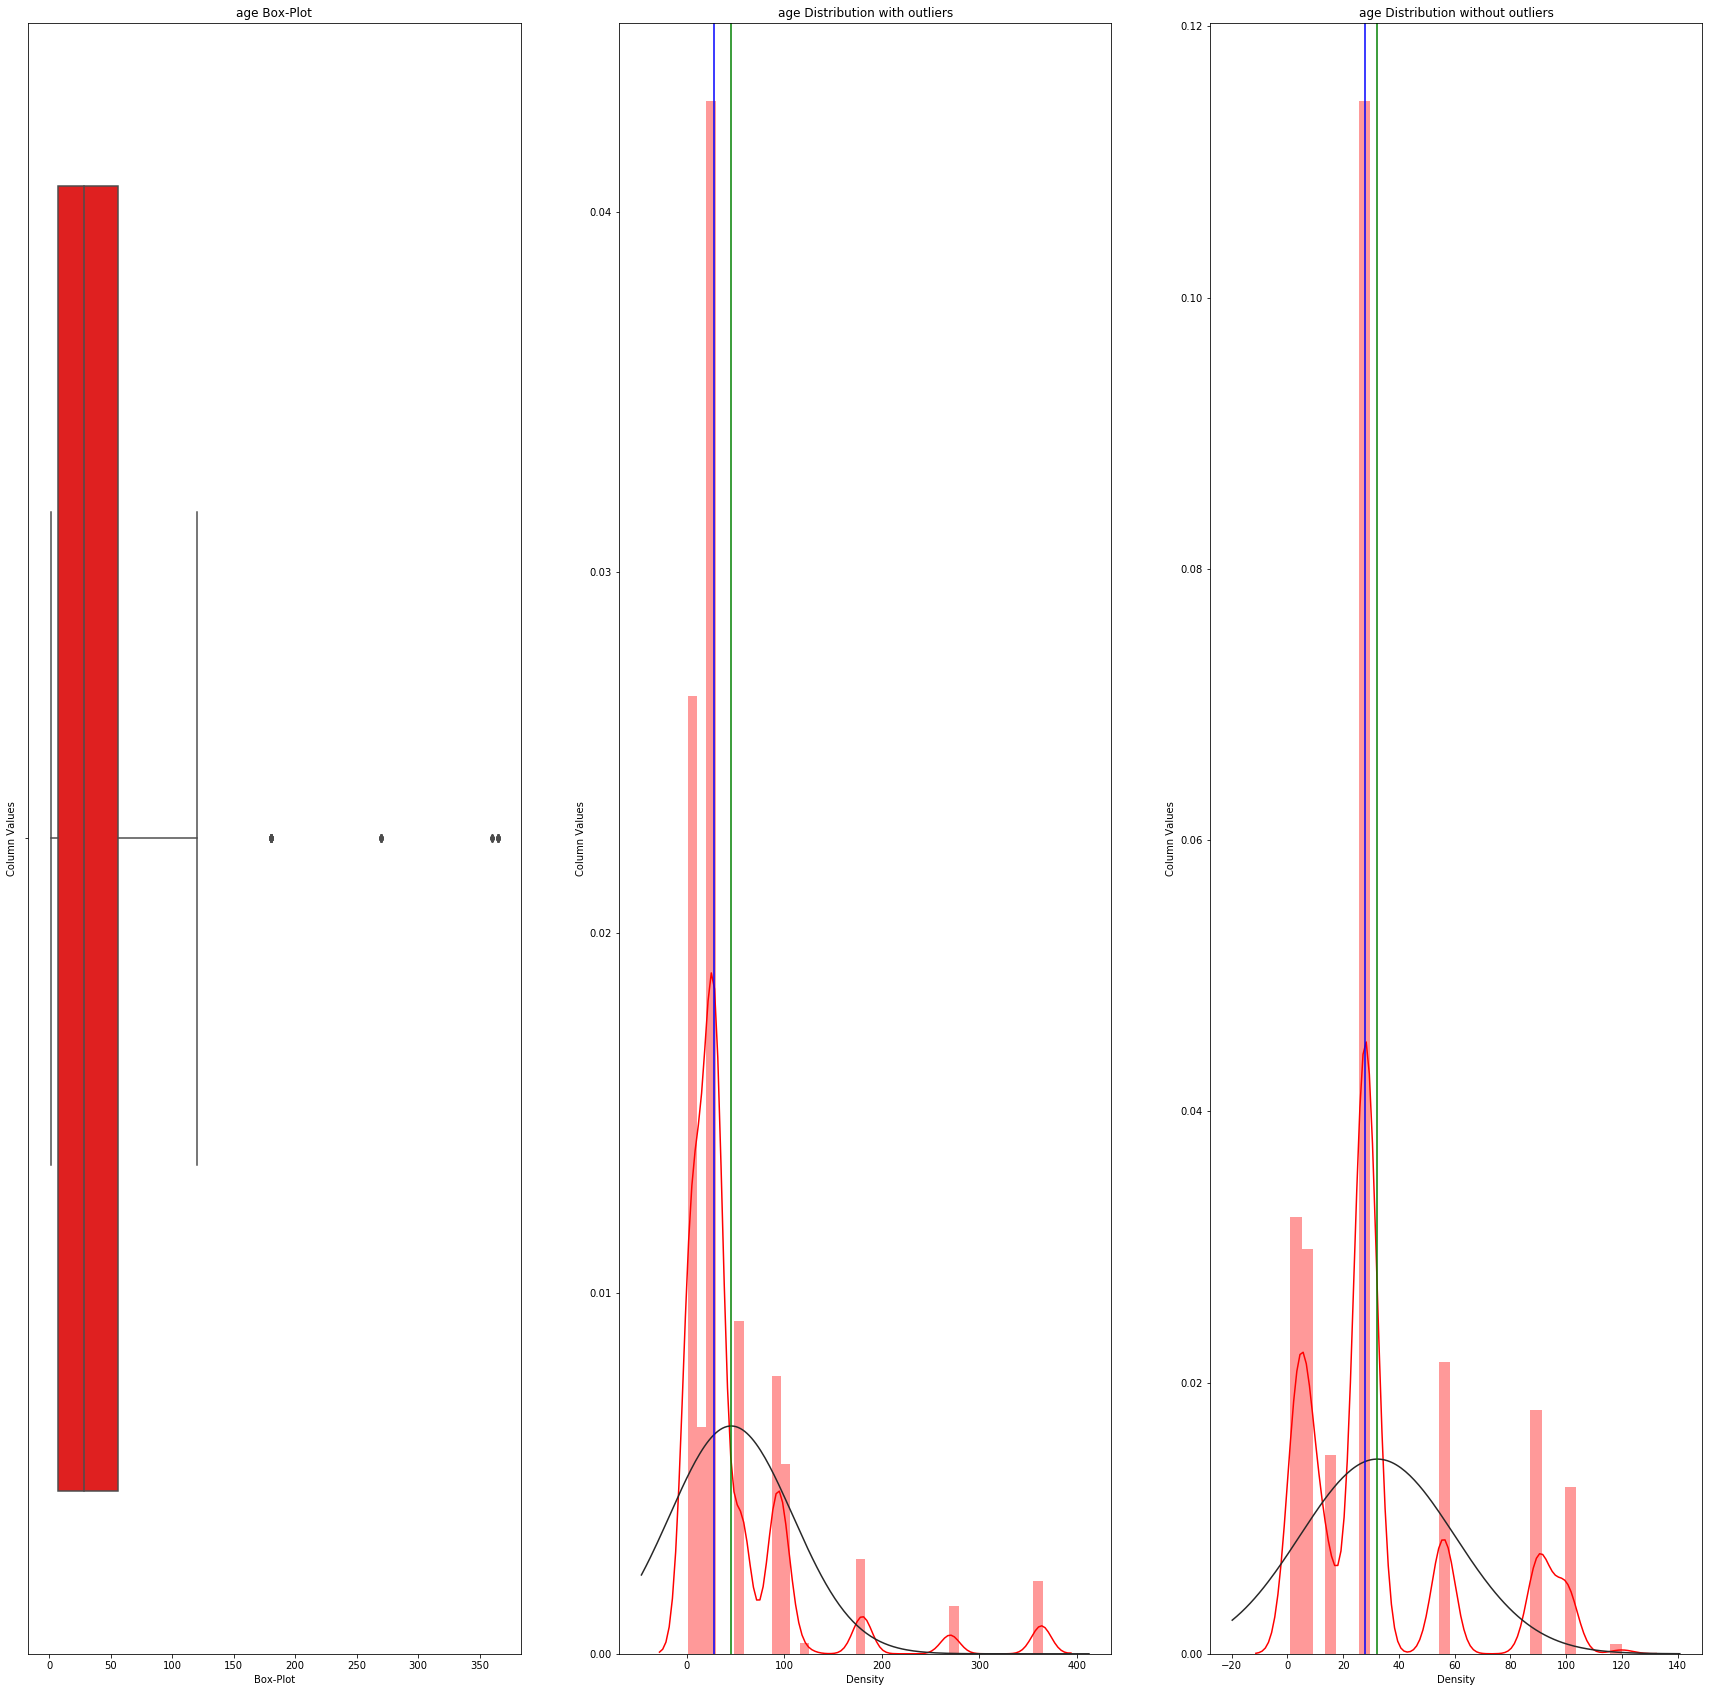

Total number of outliers is 4
/n
Outlier percentage is  0.0
/n
Outliers are  [81.75 79.99 82.6  80.2 ]


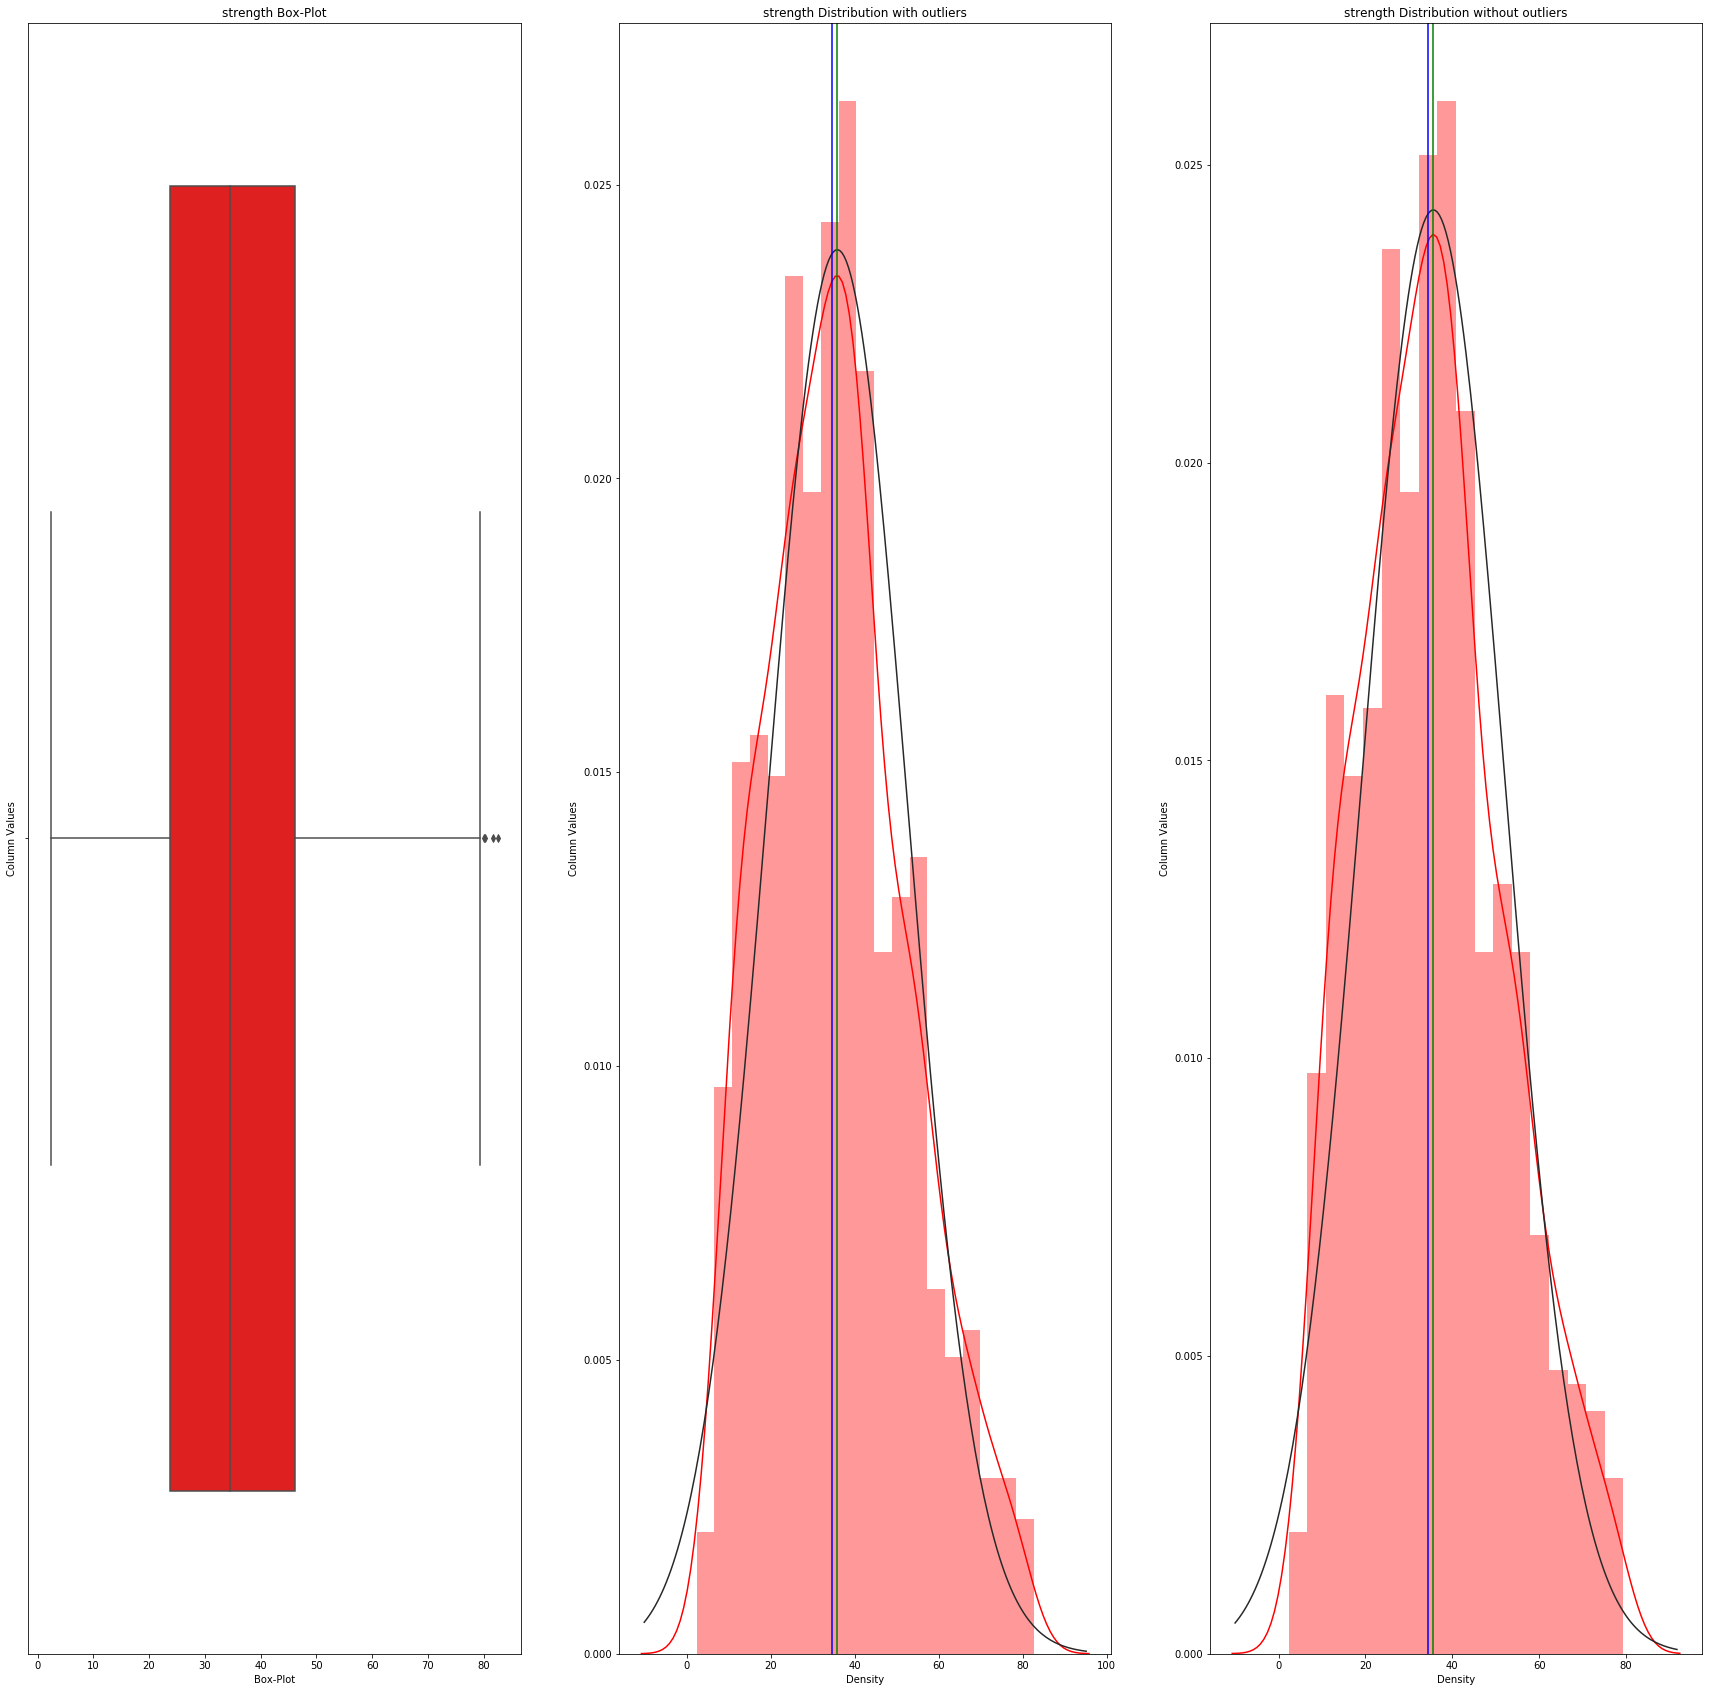

In [67]:
for col in df.columns:
    odt_plots(df,col)

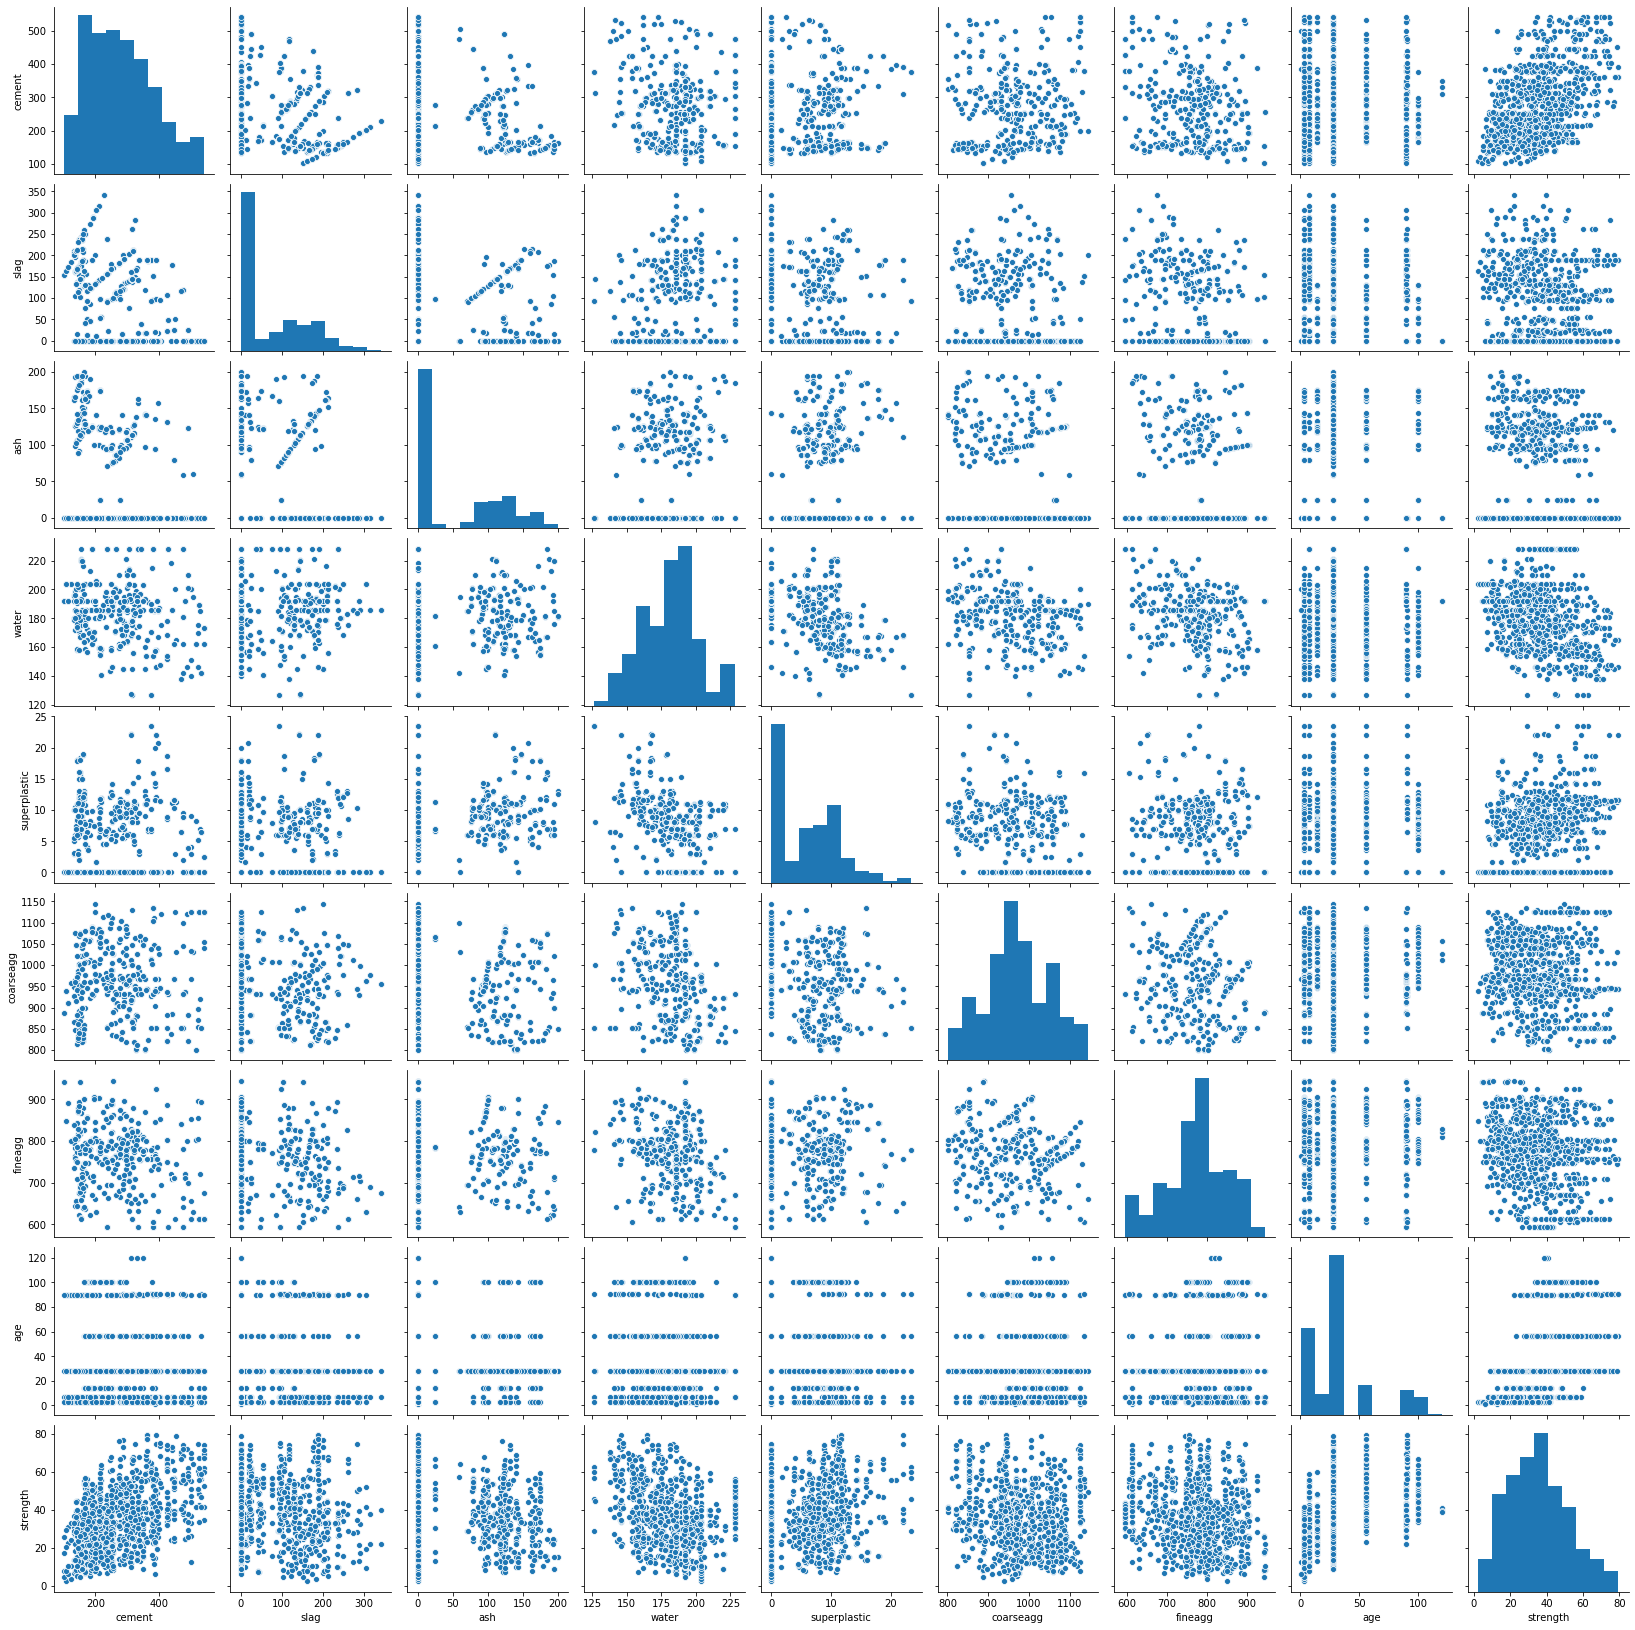

In [68]:
print(sns.pairplot(df))

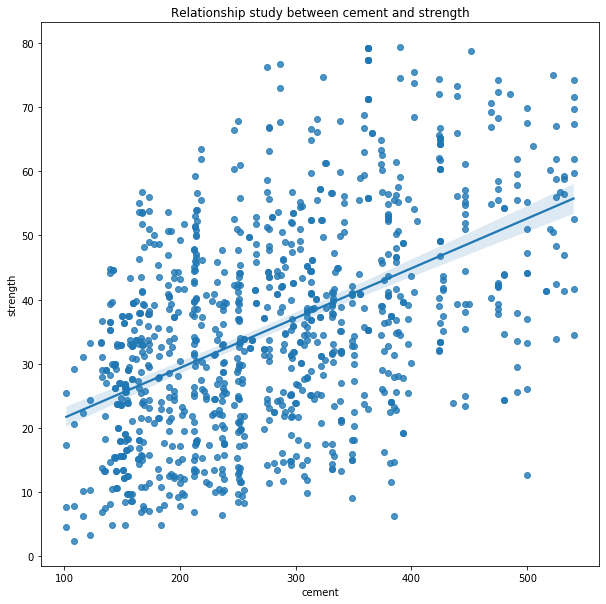

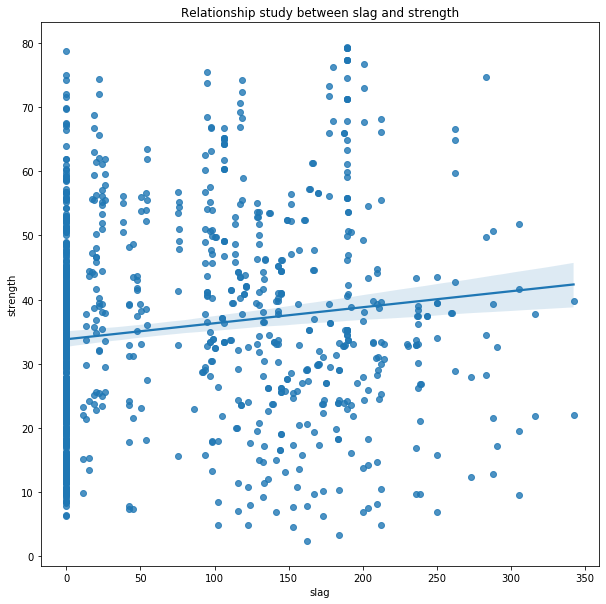

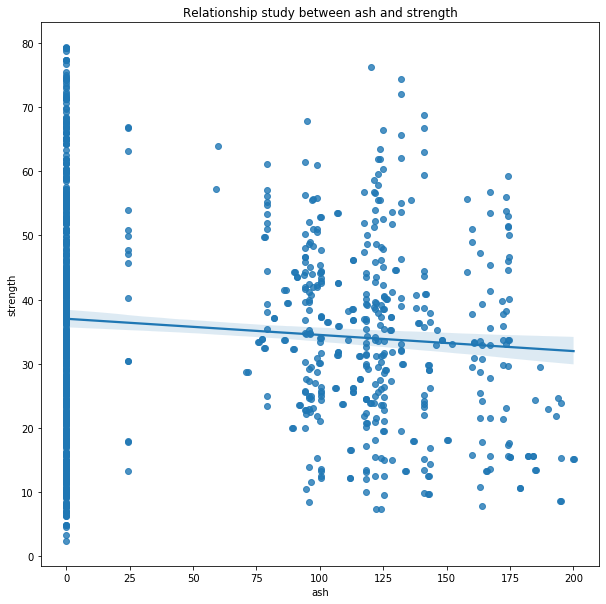

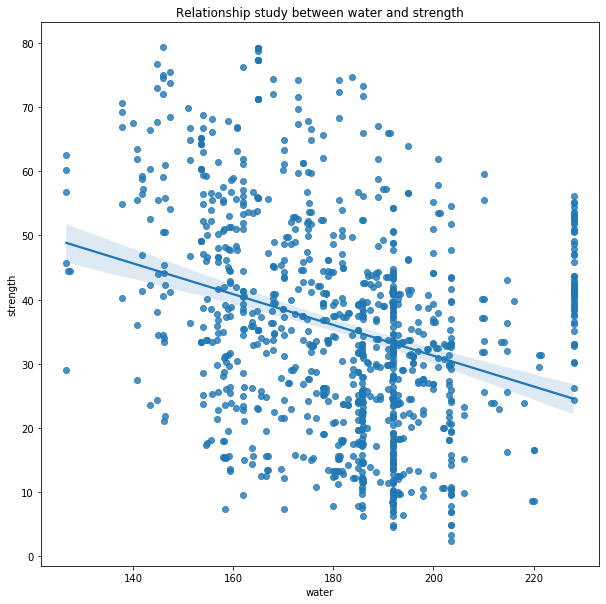

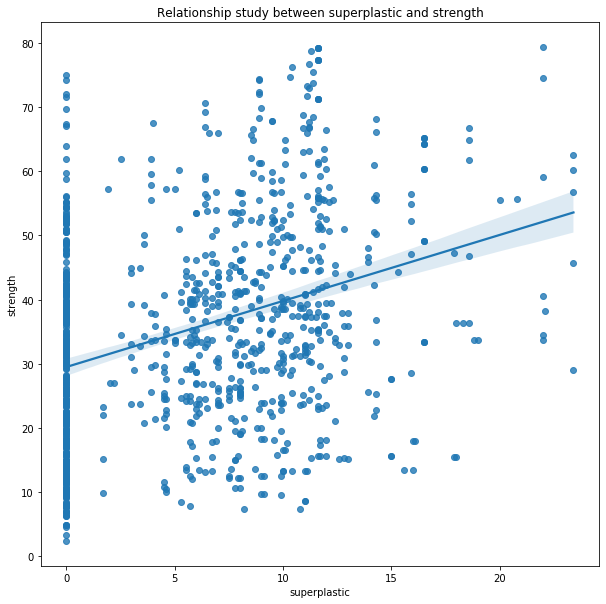

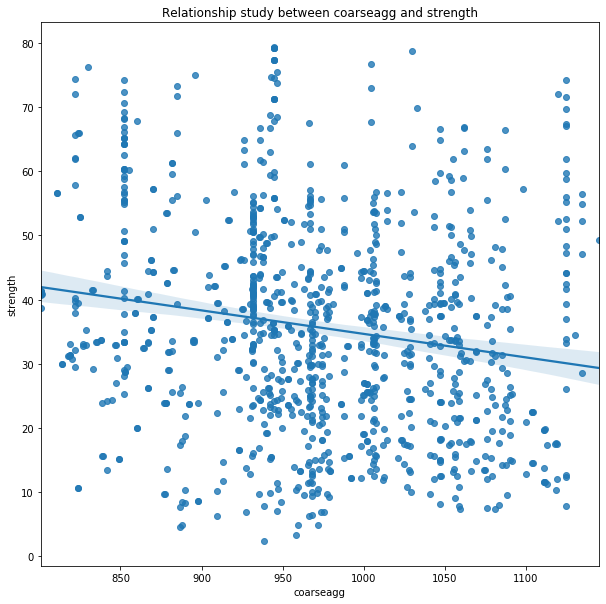

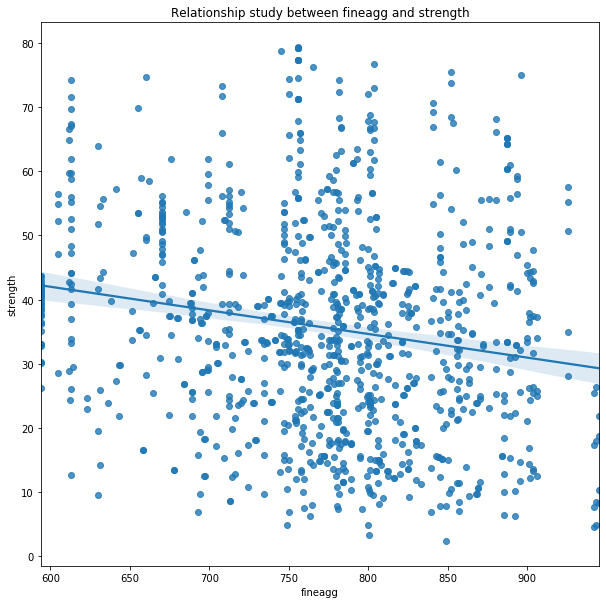

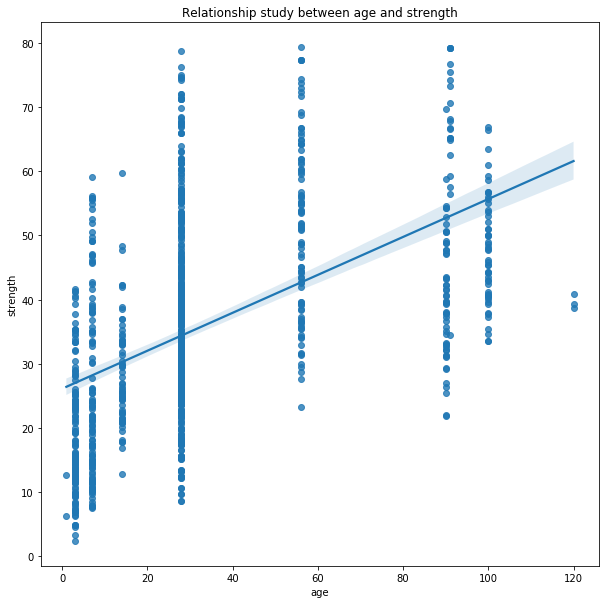

In [69]:
# Multivariant Analysis of each columns with respect to target class(strength)
for col in df.columns:
    if col!='strength':
        fig,ax1=plt.subplots(figsize=(10,10),sharex=False)
        sns.regplot(df[col],df['strength'],ax=ax1).set_title(f'Relationship study between {col} and strength')

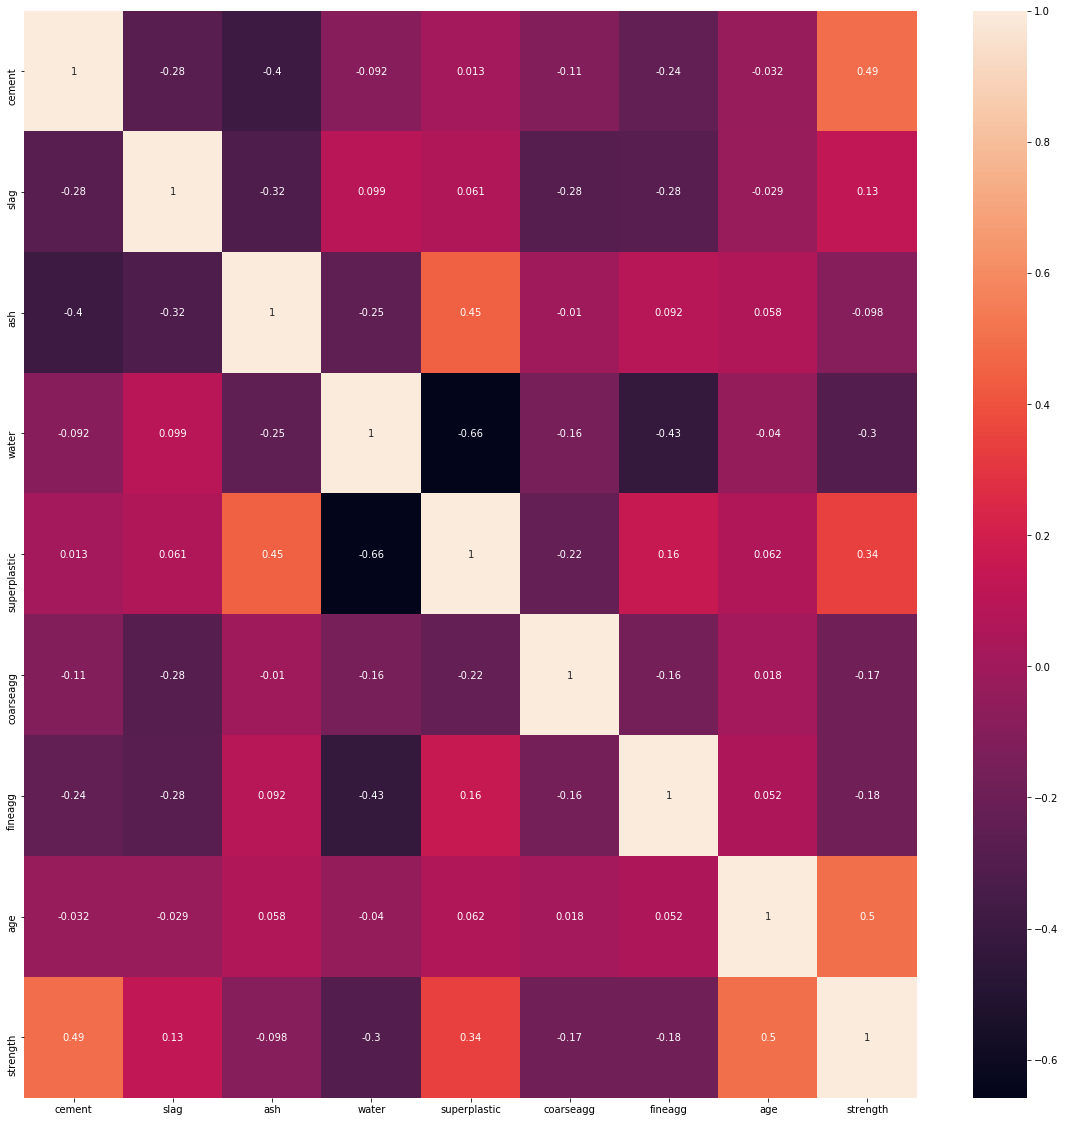

In [70]:
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

## Finding out the correlation between each variable and target

In [71]:
def correlation_variable(data,tcol):
    x_col=data.drop(columns=tcol).columns
    cor_result=[]
    for col in x_col:
        cor_result.append(data[tcol].corr(data[col]))
    result_df=pd.DataFrame([x_col,cor_result],index=['Variable','Correlation']).T.sort_values('Correlation',ascending=False)
    return result_df

In [72]:
correlation_variable(df,'strength')

Variable Correlation
7           age    0.499711
0        cement    0.493518
4  superplastic    0.342633
1          slag    0.129561
2           ash  -0.0979725
5     coarseagg   -0.173234
6       fineagg   -0.176113
3         water   -0.300043

### VIF factor, It is another method of finding multi colinearity. The formula for VIF is 1/1-r2

## Interpretation of VIF
    1. Regress each variable with another and find the R-square
    2. Find the VIF with the formulae given.
    3. If VIF is more than 5 we say it is multicolinear.
   

In [73]:
def vif_colinearity(x_col):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x_col.values,i) for i in range(x_col.shape[1])]
    vif['Feature']=x_col.columns
    return vif.sort_values('VIF Factor',ascending=False)

In [74]:
vif_colinearity(df.drop(columns='strength'))

VIF Factor       Feature
5   86.938582     coarseagg
3   81.963087         water
6   68.664404       fineagg
0   14.291158        cement
4    5.724145  superplastic
2    4.415840           ash
1    3.342314          slag
7    2.368372           age

# PCA

In [75]:
# In order to treat multi colinearity applying PCA
def apply_pca(x):
    col=[]
    n_comp=len(x.columns)
    
    # Applying Standard Scaler
    from sklearn.preprocessing import StandardScaler
    x=StandardScaler().fit_transform(x)
    
    # Applying PCA
    from sklearn.decomposition import PCA
    
    for i in range (1,n_comp):
        pca=PCA(n_components=i)
        p_com=pca.fit_transform(x)
        
        
    # Explained variance ratio
        evr=np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1]>0.90:
            n_comp=i
            break
    print('Explained Variance Ratio after applying PCA is ',evr)
    
    # Creating dataframe
    
    for j in range(1,n_comp+1):
        col.append('PC'+' '+str(j))
        
        
    p_compo=pd.DataFrame(data=p_com,columns=col)
    return p_compo

In [81]:
x=df.drop('strength',axis=1)
y=df[['strength']]

In [82]:
transform_df=apply_pca(df.drop(columns='strength')) ## Storing a treated df in a variable

Explained Variance Ratio after applying PCA is  [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [83]:
vif_colinearity(transform_df)

VIF Factor Feature
2         1.0    PC 3
0         1.0    PC 1
3         1.0    PC 4
1         1.0    PC 2
4         1.0    PC 5
5         1.0    PC 6

In [84]:
# Combining traget column and x columns
transform_df=transform_df.join(df['strength'],how='left')
transform_df

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  strength
0     1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110     29.89
1    -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061     23.51
2    -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045     29.22
3     2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548     45.85
4     0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228     18.29
...        ...       ...       ...       ...       ...       ...       ...
1025 -1.743036  0.071059 -1.492203  0.045227 -0.449481  0.968953     13.29
1026 -1.079147 -0.572265  3.269799 -1.669125 -0.962953  0.002303     41.30
1027 -0.494143  1.276989  0.318398 -0.053272 -0.153787  0.751019     44.28
1028  2.688411 -0.236744  0.056551 -0.088955  0.105206  1.368321     55.06
1029  1.824507 -2.656185  1.641783  1.924398 -0.624415 -0.394357     52.61

[1030 rows x 7 columns]

## Model Building Steps

In [24]:
# Train Test Split

def train_and_test_split(data,target,test_size=0.30,random_state=40):
    x=data.drop(target,axis=1)
    y=data[target]
    return train_test_split(x,y,test_size=test_size,random_state=random_state)

In [25]:
# Function for model building

def build_model(model_name,model,data,target):
    x_train,x_test,y_train,y_test=train_and_test_split(data,target)
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    score=r2_score(y_test,ypred)
    rmse=np.sqrt(mean_squared_error(y_test,ypred))
    temp=[model_name,score,rmse]
    return temp
    

In [26]:
lr=LinearRegression()

In [27]:
build_model('Linear Regression',lr,transform_df,'strength')

['Linear Regression', 0.5178045300512331, 11.438272815127938]

In [28]:
# Building Multiple models

def multiple_models(data,target):
    result=pd.DataFrame(columns=['Model name','R2 score','rmse'])
    result.loc[len(result)]=build_model('Linear Regression',LinearRegression(),transform_df,'strength')
    result.loc[len(result)]=build_model('Lasso Regression',Lasso(),transform_df,'strength')
    result.loc[len(result)]=build_model('Ridge Regression',Ridge(),transform_df,'strength')
    result.loc[len(result)]=build_model('Decision Tree',DecisionTreeRegressor(),transform_df,'strength')
    result.loc[len(result)]=build_model('KNN Regressor',KNeighborsRegressor(),transform_df,'strength')
    result.loc[len(result)]=build_model('SVR Regressor',SVR(),transform_df,'strength')
    result.loc[len(result)]=build_model('Random Forest Regressor',RandomForestRegressor(),transform_df,'strength')
    result.loc[len(result)]=build_model('Adaboost Regressor',AdaBoostRegressor(),transform_df,'strength')
    result.loc[len(result)]=build_model('Gradient Boost Regressor',GradientBoostingRegressor(),transform_df,'strength')
    result.loc[len(result)]=build_model('XGBoost Regressor',XGBRegressor(),transform_df,'strength')
    return result

In [29]:
multiple_models(transform_df,'strength')

[09:17:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model name  R2 score       rmse
0         Linear Regression  0.517805  11.438273
1          Lasso Regression  0.505987  11.577585
2          Ridge Regression  0.517791  11.438430
3             Decision Tree  0.653815   9.691770
4             KNN Regressor  0.683335   9.269339
5             SVR Regressor  0.591659  10.525923
6   Random Forest Regressor  0.797477   7.412859
7        Adaboost Regressor  0.597674  10.448109
8  Gradient Boost Regressor  0.760952   8.053634
9         XGBoost Regressor  0.756184   8.133550

## Performing Cross Validation

In [30]:
def Kfold_CV(x,y,folds=10):
    
    score_lr=cross_val_score(LinearRegression(),x,y,cv=folds)
    score_lassor=cross_val_score(Lasso(),x,y,cv=folds)
    score_ridger=cross_val_score(Ridge(),x,y,cv=folds)
    score_dtr=cross_val_score(DecisionTreeRegressor(),x,y,cv=folds)
    score_knnr=cross_val_score(KNeighborsRegressor(),x,y,cv=folds)
    score_svr=cross_val_score(SVR(),x,y,cv=folds)
    score_randomr=cross_val_score(RandomForestRegressor(),x,y,cv=folds)
    score_adaboostr=cross_val_score(AdaBoostRegressor(),x,y,cv=folds)
    score_gradientr=cross_val_score(GradientBoostingRegressor(),x,y,cv=folds)
    score_xgboostr=cross_val_score(XGBRegressor(),x,y,cv=folds)
    
    models=[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor()]
    model_names=['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regression','KNN Regression','SVR Regression','Random Forest Regression','Adaboost Regression','Gradient Boost Regression','XGBoost Regression']
    scores=[score_lr,score_lassor,score_ridger,score_dtr,score_knnr,score_svr,score_randomr,score_adaboostr,score_gradientr,score_xgboostr]
    
    
    result=[]
    for i in range(0,len(models)):
        score_mean=np.mean(scores[i])
        score_sd=np.std(scores[i])
        n_names=model_names[i]
        temp=[n_names,score_mean,score_sd]
        result.append(temp)
        
    result_df=pd.DataFrame(result,columns=['Model name','Accuracy','Standard Deviation'])
    return result_df

In [31]:
x=transform_df.drop('strength',axis=1)
y=transform_df[['strength']]

In [32]:
multiple_models(x,y)

[09:17:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model name  R2 score       rmse
0         Linear Regression  0.517805  11.438273
1          Lasso Regression  0.505987  11.577585
2          Ridge Regression  0.517791  11.438430
3             Decision Tree  0.638784   9.899931
4             KNN Regressor  0.683335   9.269339
5             SVR Regressor  0.591659  10.525923
6   Random Forest Regressor  0.793260   7.489645
7        Adaboost Regressor  0.613490  10.240689
8  Gradient Boost Regressor  0.760803   8.056128
9         XGBoost Regressor  0.756184   8.133550

## Hyperparameter Tuning

In [33]:
def tuning_model(x,y,fold=10):
    
    
    params_lasso={'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    params_ridge={'alpha':[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    params_knn={'n_neighbors':[2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    params_rd={'n_estimators':[50,60,70,80,90,100,200,300,400,500]}
    params_ada={'n_estimators':[50,60,70,80,90,100,200,300,400,500,1000,2000,3000,4000,5000],'learning_rate':[0.001,0.01,0.1,1]}
    params_gboost={'n_estimators':[50,60,70,80,90,100,200,300,400,500,1000,2000,3000,4000,5000],'learning_rate':[0.001,0.01,0.1,1]}
    params_xgboost={'n_estimators':[50,60,70,80,90,100,200,300,400,500,1000,2000,3000,4000,5000],'learning_rate':[0.001,0.01,0.1,1]}
    
    
    tuned_lasso=GridSearchCV(Lasso(),param_grid=params_lasso,cv=fold)
    tuned_ridge=GridSearchCV(Ridge(),param_grid=params_ridge,cv=fold)
    tuned_knn=GridSearchCV(KNeighborsRegressor(),param_grid=params_knn,cv=fold)
    tuned_rd=GridSearchCV(RandomForestRegressor(),param_grid=params_rd,cv=fold)
    tuned_ada=GridSearchCV(AdaBoostRegressor(),param_grid=params_ada,cv=fold)
    tuned_gradient=GridSearchCV(GradientBoostingRegressor(),param_grid=params_gboost,cv=fold)
    tuned_xgboost=GridSearchCV(XGBRegressor(),param_grid=params_xgboost,cv=fold)
    
    tuned_lasso.fit(x,y)
    tuned_ridge.fit(x,y)
    tuned_knn.fit(x,y)
    tuned_rd.fit(x,y)
    tuned_ada.fit(x,y)
    tuned_gradient.fit(x,y)
    tuned_xgboost.fit(x,y)
    
    
    tuned_models=[tuned_lasso,tuned_ridge,tuned_knn,tuned_rd,tuned_ada,tuned_gradient,tuned_xgboost]
    tuned_model_name=['Lasso Regression','Ridge Regression','KNN Regression','Random Forest Regression','Adaboost Regression','Gradient Boost Regression','XGBoost Regression']
    for i in range(0,len(tuned_models)):
        print('Model Name',tuned_model_name[i])
        print('Best Params',tuned_models[i].best_params_)
    

In [34]:
tuning_model(x,y)

In [35]:
def tuned_multiple_models(data,target,folds=10):
    score_lr=cross_val_score(LinearRegression(),x,y,cv=folds)
    score_lassor=cross_val_score(Lasso(alpha=0.1),x,y,cv=folds)
    score_ridger=cross_val_score(Ridge(alpha=10),x,y,cv=folds)
    score_dtr=cross_val_score(DecisionTreeRegressor(),x,y,cv=folds)
    score_knnr=cross_val_score(KNeighborsRegressor(n_neighbors=3),x,y,cv=folds)
    score_svr=cross_val_score(SVR(),x,y,cv=folds)
    score_randomr=cross_val_score(RandomForestRegressor(n_estimators=500),x,y,cv=folds)
    score_adaboostr=cross_val_score(AdaBoostRegressor(learning_rate=1,n_estimators=4000),x,y,cv=folds)
    score_gradientr=cross_val_score(GradientBoostingRegressor(learning_rate=0.1,n_estimators=3000),x,y,cv=folds)
    score_xgboostr=cross_val_score(XGBRegressor(learning_rate=0.1,n_estimators=4000),x,y,cv=folds)
    
    models=[LinearRegression(),Lasso(alpha=0.1),Ridge(alpha=10),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),RandomForestRegressor(n_estimators=500),AdaBoostRegressor(learning_rate=1,n_estimators=4000),GradientBoostingRegressor(learning_rate=0.1,n_estimators=3000),XGBRegressor(learning_rate=0.1,n_estimators=4000)]
    model_names=['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree Regression','KNN Regression','SVR Regression','Random Forest Regression','Adaboost Regression','Gradient Boost Regression','XGBoost Regression']
    scores=[score_lr,score_lassor,score_ridger,score_dtr,score_knnr,score_svr,score_randomr,score_adaboostr,score_gradientr,score_xgboostr]
    
    
    result=[]
    for i in range(0,len(models)):
        score_mean=np.mean(scores[i])
        score_sd=np.std(scores[i])
        n_names=model_names[i]
        temp=[n_names,score_mean,score_sd]
        result.append(temp)
        
    result_df=pd.DataFrame(result,columns=['Model name','Accuracy','Standard Deviation'])
    return result_df

In [36]:
tuned_multiple_models(transform_df,'strength')

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[09:20:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:20:50] WARNI

Model name  Accuracy  Standard Deviation
0          Linear Regression  0.543910            0.073479
1           Lasso Regression  0.544741            0.072471
2           Ridge Regression  0.544011            0.072633
3   Decision Tree Regression  0.668560            0.082399
4             KNN Regression  0.713166            0.051582
5             SVR Regression  0.637752            0.042685
6   Random Forest Regression  0.819290            0.035370
7        Adaboost Regression  0.633669            0.063288
8  Gradient Boost Regression  0.831596            0.034702
9         XGBoost Regression  0.832604            0.038891

## K-Means Clustering

In [37]:
from sklearn.cluster import KMeans

In [38]:
x=df.drop('strength',axis=1)
y=df[['strength']]

In [39]:
labels=KMeans(n_clusters=2,random_state=100).fit_predict(x)

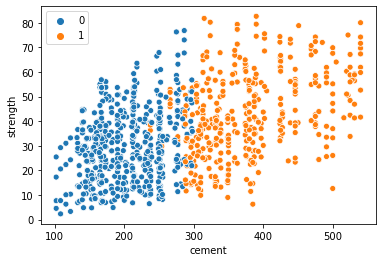

In [40]:
sns.scatterplot(x.cement,y.strength,hue=labels)

In [41]:
def K_means_clsutering(x,target,labels):
    columns=list(set(list(x.columns))-set(df['strength']))
    r=int(len(columns)/2)
    if r % 2==0:
        r=r
    else:
        r=r+1
        
    f,ax=plt.subplots(r,2,figsize=(15,15))
    a=0
    for column in range (0,r):
        for j in range(0,2):
            if a!=len(columns):
                ax[column][j].scatter(x[target],x[columns[a]],c=labels)
                ax[column][j].set_xlabel(target)
                ax[column][j].set_ylabel(columns[a])
                a=a+1

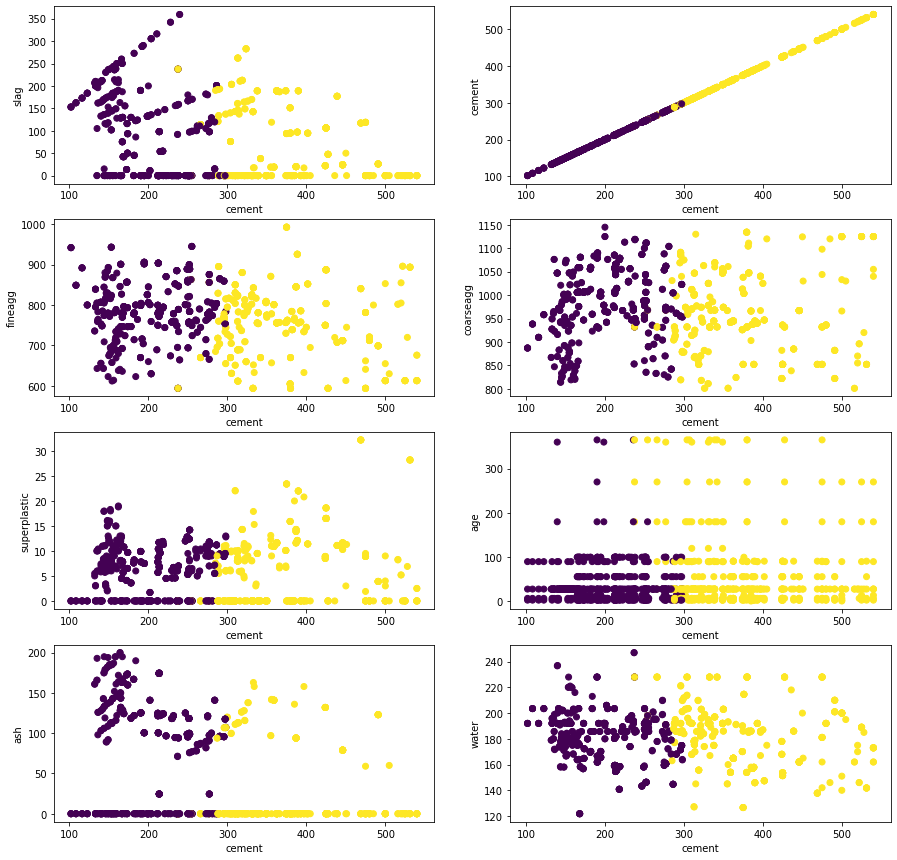

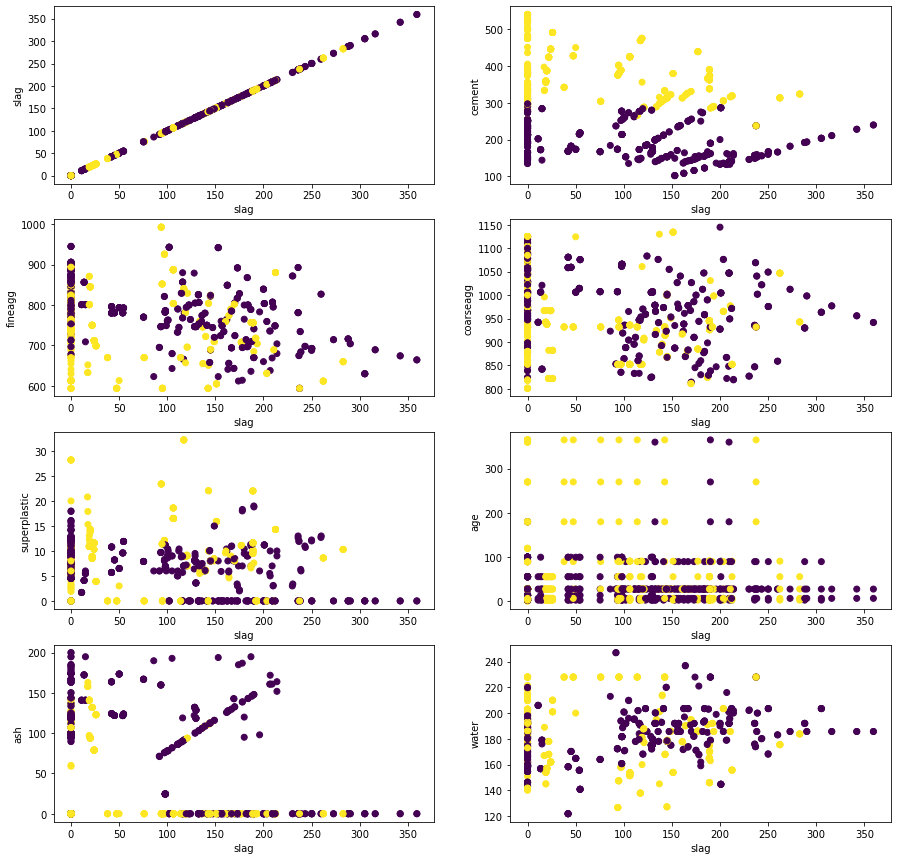

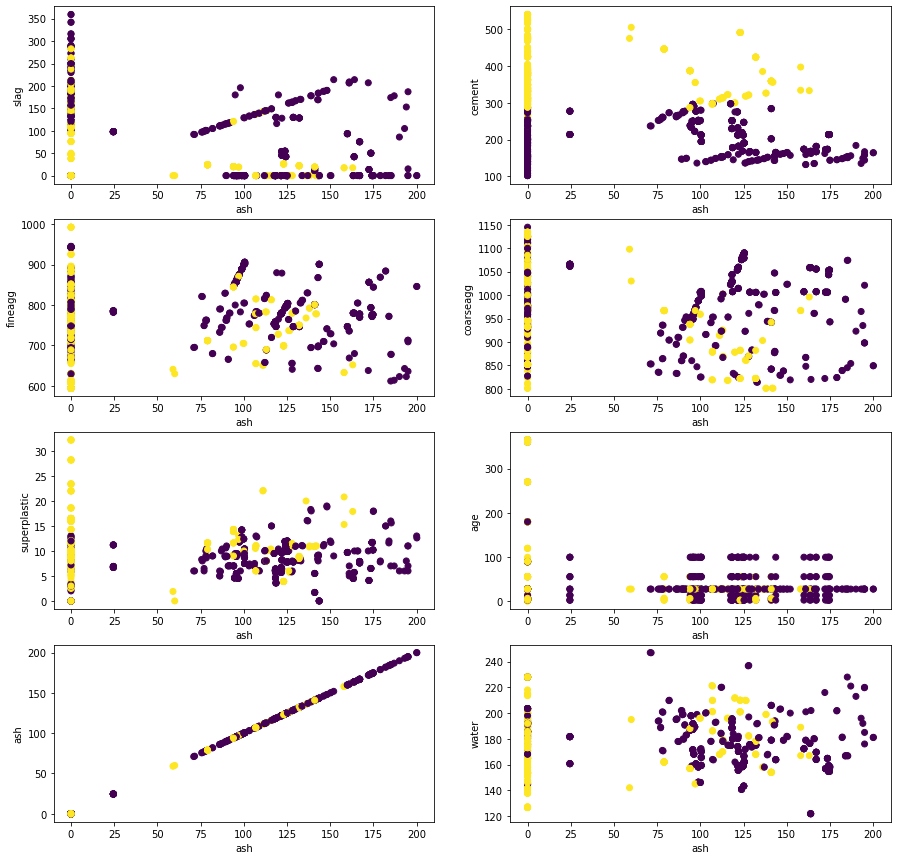

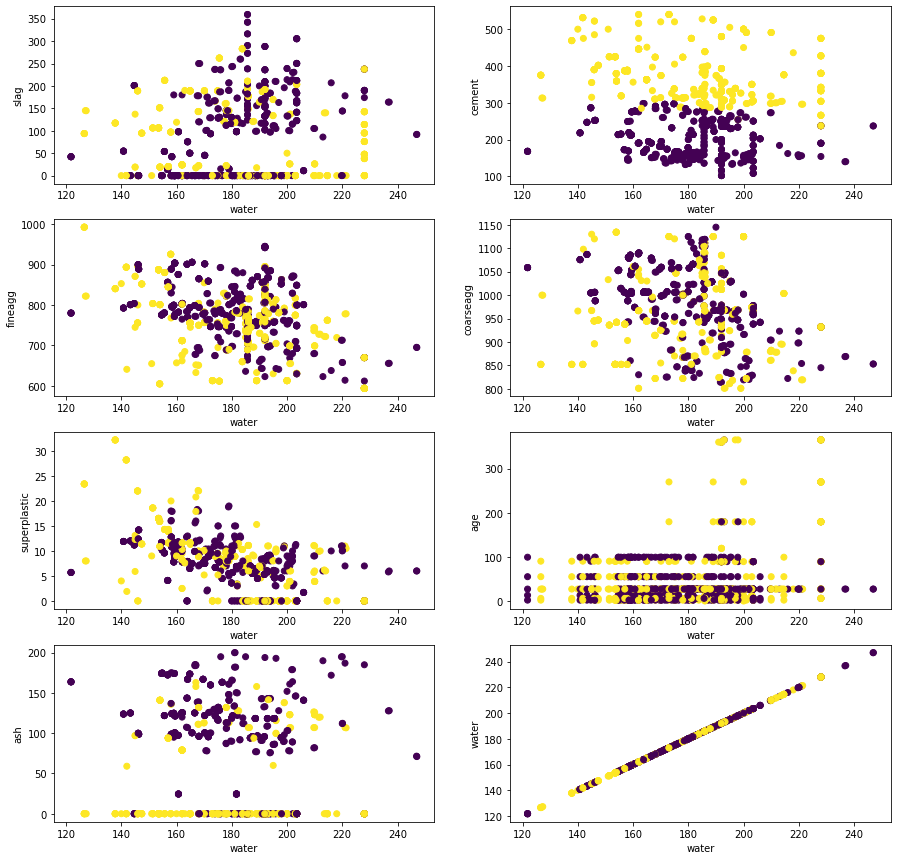

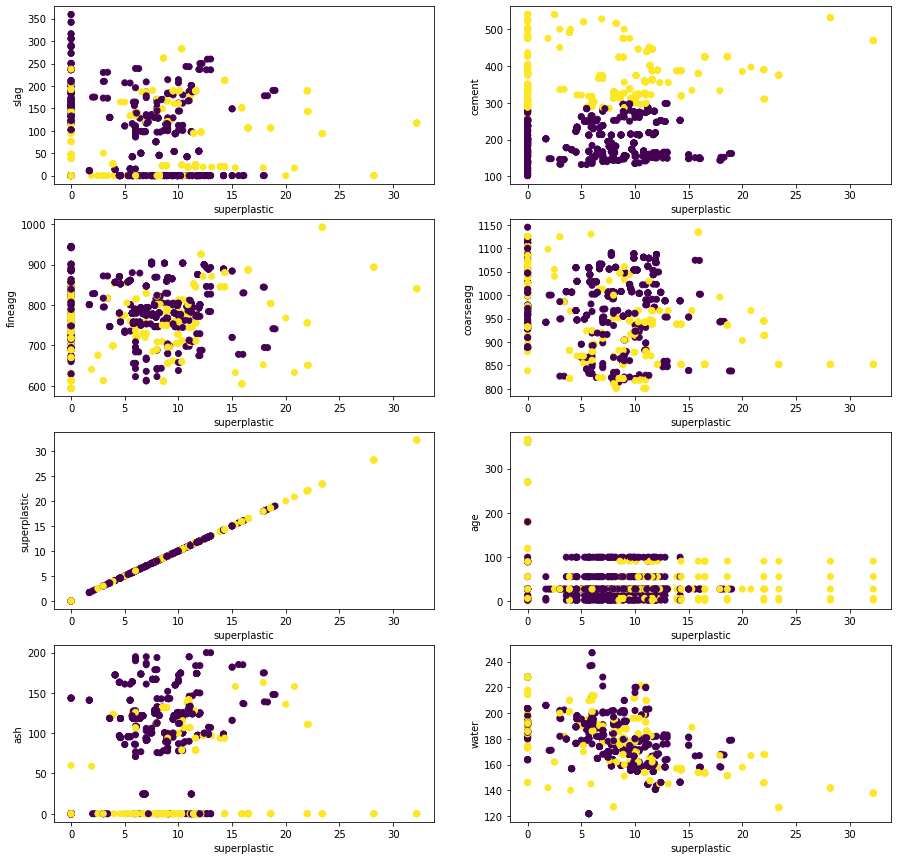

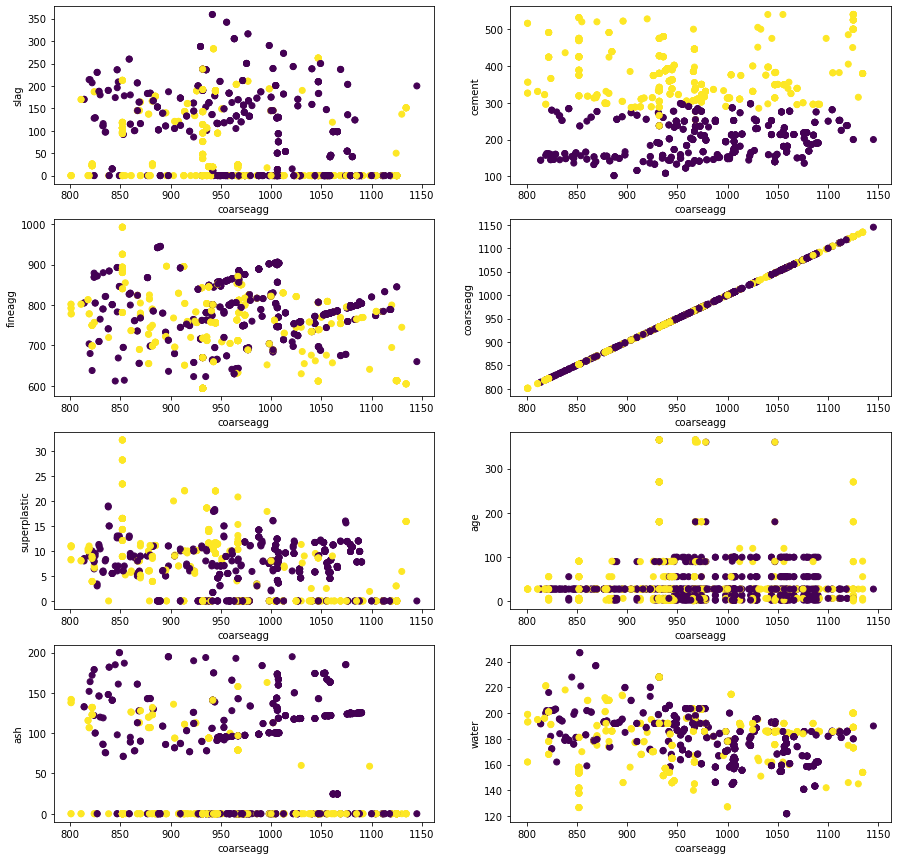

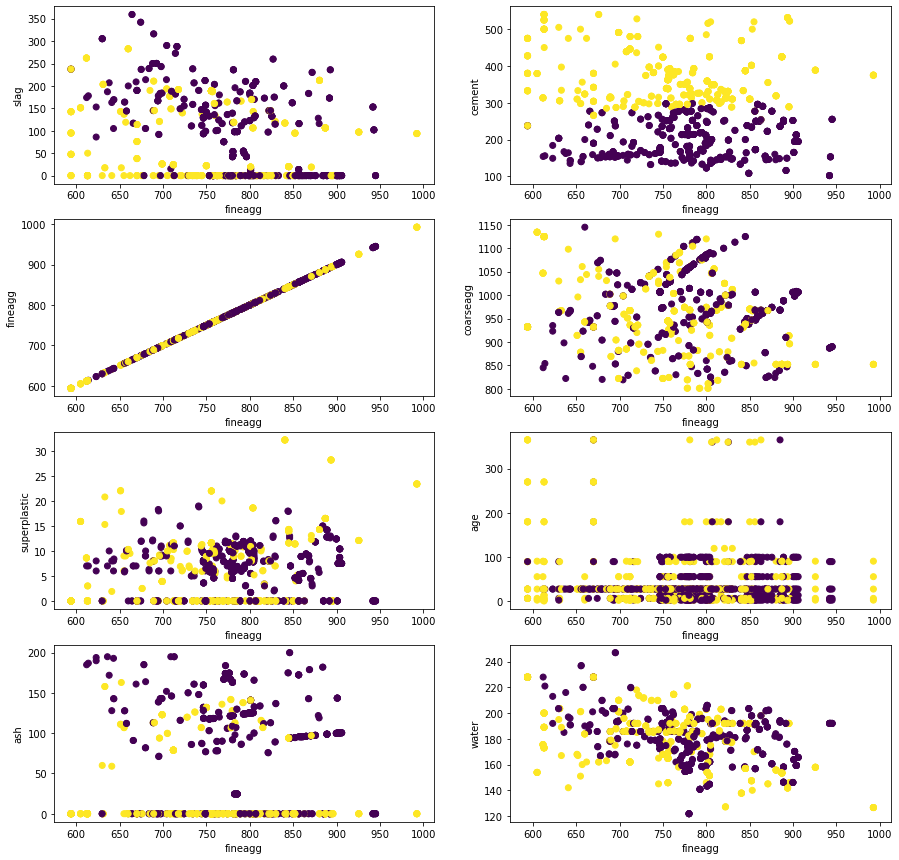

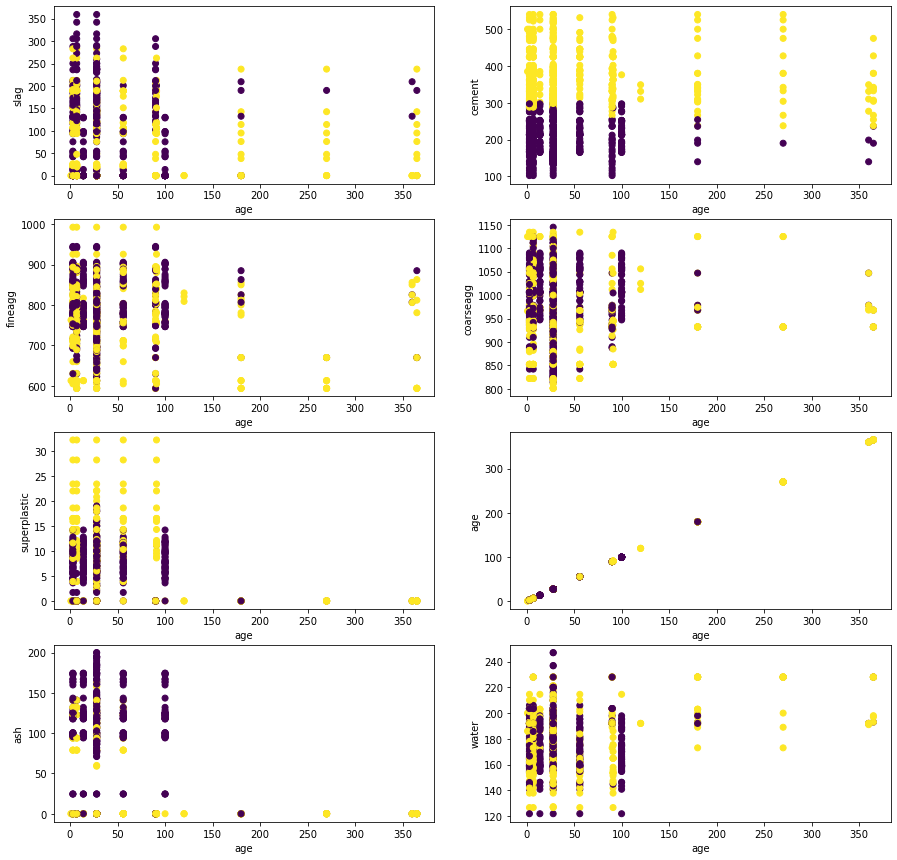

In [42]:
for col in x.columns:
    K_means_clsutering(x,col,labels)

In [43]:
# fineagg,water,coarseagg,superplastic,
# From the above plots, we can observe that cement is forming a cluster almost with all the features.

In [44]:
new_df=df.join(pd.DataFrame(labels,columns=['labels']),how='left')

In [45]:
new_df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  labels  
0        29.89       0  
1        23.51       0  
2        29.22       0  
3        45.85       1  
4        18.29       0  
...        ...     ...  
1025     13.29       0  
1026     41.30       1  
1027     44.28       0  
1028     55.06       1  
1029     52.61       1  

[1030 rows x 10 columns]

In [46]:
centroid=new_df.groupby('labels')['cement'].agg(['mean','median'])

In [47]:
centroid

mean  median
labels                    
0       203.130389   201.0
1       376.360129   362.6

In [48]:
new_df=new_df.merge(centroid,on='labels',how='left')

In [49]:
new_df

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength  labels        mean  median  
0        29.89       0  203.130389   201.0  
1        23.51       0  203.130389   201.0  
2        29.22       0  203.130389   201.0  
3        45.85       1  376.360129   362.6  
4        18.29       0  203.130389   201.0  
...        ...     ...         ...     ...  
1025     13.29       0  203.130389   201.0  
1026     41.30       1  376.360129   362.6  
1027     44.28       0  203.130389   201.0  
1028     55.06       1  376.360129   362.6  
1029     52.61       1  376.360129   362.6  

[1030 rows x 12 columns]

In [50]:
new_df.drop('labels',axis=1)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1      168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2      250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3      266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4      154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   135.0    0.0  166.0  180.0          10.0      961.0    805.0   28   
1026   531.3    0.0    0.0  141.8          28.2      852.1    893.7    3   
1027   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0    0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0    0.0  173.0           0.0     1125.0    613.0    7   

      strength        mean  median  
0        29.89  203.130389   201.0  
1        23.51  203.130389   201.0  
2        29.22  203.130389   201.0  
3        45.85  376.360129   362.6  
4        18.29  203.130389   201.0  
...        ...         ...     ...  
1025     13.29  203.130389   201.0  
1026     41.30  376.360129   362.6  
1027     44.28  203.130389   201.0  
1028     55.06  376.360129   362.6  
1029     52.61  376.360129   362.6  

[1030 rows x 11 columns]

In [51]:
x1=new_df.drop('strength',axis=1)
y1=new_df[['strength']]

In [52]:
multiple_models(x1,y1)

[09:21:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model name  R2 score       rmse
0         Linear Regression  0.517805  11.438273
1          Lasso Regression  0.505987  11.577585
2          Ridge Regression  0.517791  11.438430
3             Decision Tree  0.611149  10.271658
4             KNN Regressor  0.683335   9.269339
5             SVR Regressor  0.591659  10.525923
6   Random Forest Regressor  0.801203   7.344364
7        Adaboost Regressor  0.586297  10.594807
8  Gradient Boost Regressor  0.761049   8.051990
9         XGBoost Regressor  0.756184   8.133550

In [53]:
# The accuracy of Decision Tree, Random forest, Adaboost and Gradient has increased after performing clustering

## Feature performance (Advanced)

In [54]:
x_train,x_test,y_train,y_test=train_and_test_split(new_df,'strength')

In [55]:
xgb=XGBRegressor().fit(x_train,y_train)

[09:21:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


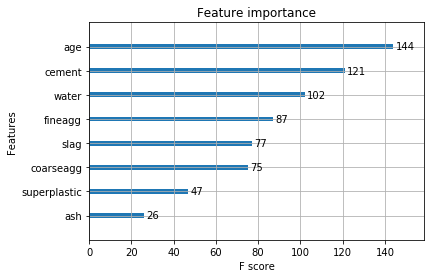

In [56]:
xgboost.plot_importance(xgb)

In [57]:
new_df1=new_df[['age','cement','water','coarseagg','fineagg','superplastic','strength']]
x1_new=new_df1[['age','cement','water','coarseagg','fineagg','superplastic']]
y1_new=new_df1[['strength']]

In [58]:
multiple_models(new_df1,'strength')

[09:21:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Model name  R2 score       rmse
0         Linear Regression  0.517805  11.438273
1          Lasso Regression  0.505987  11.577585
2          Ridge Regression  0.517791  11.438430
3             Decision Tree  0.624590  10.092568
4             KNN Regressor  0.683335   9.269339
5             SVR Regressor  0.591659  10.525923
6   Random Forest Regressor  0.799597   7.373969
7        Adaboost Regressor  0.597081  10.455813
8  Gradient Boost Regressor  0.761631   8.042180
9         XGBoost Regressor  0.756184   8.133550

In [59]:
tuned_multiple_models(new_df1,'strength')

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[09:25:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:25:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:25:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:26:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:26:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:26:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:26:18] WARNI

Model name  Accuracy  Standard Deviation
0          Linear Regression  0.591910            0.073077
1           Lasso Regression  0.591903            0.073003
2           Ridge Regression  0.591911            0.073075
3   Decision Tree Regression  0.869911            0.039744
4             KNN Regression  0.711195            0.067905
5             SVR Regression  0.240296            0.037658
6   Random Forest Regression  0.918652            0.023347
7        Adaboost Regression  0.734134            0.044177
8  Gradient Boost Regression  0.943911            0.018134
9         XGBoost Regression  0.944174            0.020913

In [60]:
# Selecting the features through XGBoost
import xgbfir
from numpy import sort
from sklearn.feature_selection import SelectFromModel

In [63]:
l1=[]
threshold=sort(xgb.feature_importances_)
for thresh in threshold:
    selection=SelectFromModel(xgb,threshold=thresh,prefit=True)
    select_x_train=selection.transform(x_train)
    model=XGBRegressor()
    model.fit(select_x_train,y_train)
    select_x_test=selection.transform(x_test)
    pred=model.predict(select_x_test)
    result=[thresh,select_x_train.shape[1],np.sqrt(mean_squared_error(y_test,pred)),r2_score(y_test,pred)]
    l1.append(result)
result_df=pd.DataFrame(l1,columns=['threshold','no_of_features','rmse','r2_score'])
result_df

[09:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:28:21] WARNI

threshold  no_of_features       rmse  r2_score
0    0.000000              11   5.289049  0.896900
1    0.000000              11   5.289049  0.896900
2    0.000000              11   5.289049  0.896900
3    0.027176               8   5.289049  0.896900
4    0.030161               7   5.239879  0.898808
5    0.045136               6   5.172773  0.901384
6    0.087762               5   5.439654  0.890945
7    0.090496               4   7.253909  0.806069
8    0.188196               3   7.804605  0.775506
9    0.263655               2   8.748123  0.717946
10   0.267418               1  12.855630  0.390899

## Learning curve Analysis

In [64]:
from sklearn.model_selection import learning_curve

In [74]:
def generate_learning_curve(model,estimator):
    train_size,train_score,test_score=learning_curve(estimator,X=x,y=y,cv=10)
    train_score_mean=np.mean(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    plt.plot(train_size,train_score_mean,color='g')
    plt.plot(train_size,test_score_mean,color='b')
    plt.xlabel('Data Samples')
    plt.ylabel('Accuracy')
    plt.title('Learning curve for '+ model)
    plt.legend(['Training_score','Testing_score'])

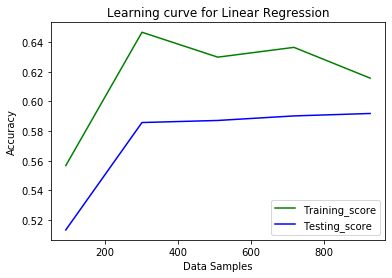

In [75]:
generate_learning_curve('Linear Regression',LinearRegression())

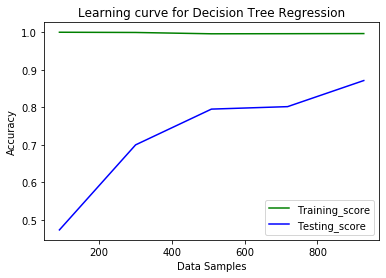

In [76]:
generate_learning_curve('Decision Tree Regression',DecisionTreeRegressor())

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selec

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selec

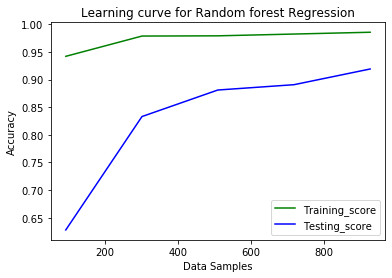

In [77]:
generate_learning_curve('Random forest Regression',RandomForestRegressor())

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

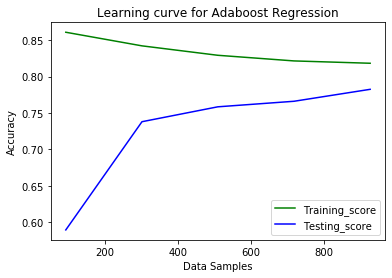

In [78]:
generate_learning_curve('Adaboost Regression',AdaBoostRegressor())

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

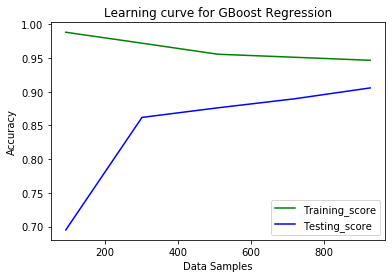

In [79]:
generate_learning_curve('GBoost Regression',GradientBoostingRegressor())

[08:39:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:22] WARNI

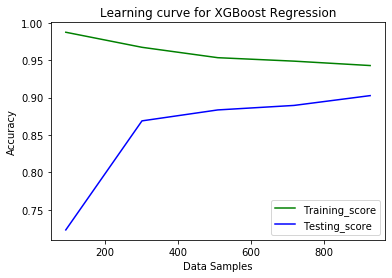

In [80]:
generate_learning_curve('XGBoost Regression',XGBRegressor())

## Task - Instead of selecting costly models, how can we perform certain techniques to select Linear Regression as our model which will give me an accuracy of around 75%